# FORECASTING HIGH-VALUE ZIPCODES BY UTILIZING TIME SERIES ANALYSIS

#### INTRODUCTION.

In the dynamic world of real estate investments, strategic decision-making is crucial for achieving success and maximizing returns. With the advent of advanced data analytics techniques, such as time series modeling, investors now have powerful tools at their disposal to forecast market trends and identify lucrative opportunities

 ![Modern Residential District](4-modern-doral-model-60-exterior.jpeg)


#### PHASE 4 GROUP 1

## SUMMARY:

In this project, we delve into the domain of real estate investment by harnessing the wealth of information provided by the https://www.zillow.com/research/data/ to unlock actionable insights for prospective investors.

## 1. BUSINESS UNDERSTANDING.
STAKEHOLDER; PROSPECT PROPERTY INVESTMENTS.
Our client is an investor with a budget of 300,000 dollars who, after reading articles such as   (https://www.worldbizmagazine.net/post/miami-dade-best-region-in-north-america-for-investment-2021-2022), believes that Miami-Dade County presents the most promising investment opportunities in North America. Inspired by these insights, they seek to leverage data science and real estate expertise to make informed investment decisions in the area.

## BUSINESS PROBLEM:
The client aims to capitalize on the potential highlighted in the articles by identifying lucrative investment opportunities within Miami-Dade County. Specifically, they are interested in properties with high returns on investment (ROI) within a 3-year timeframe.

#### BUSINESS OBJECTIVE:

1.Identify properties in Miami-Dade County with the potential for high ROI within a 3-year timeframe.

2.Analyze historical data, market trends, and economic indicators to forecast future property values and ROI accurately.

3.Provide actionable recommendations to the client based on the analysis to maximize investment returns and minimize risks.

#### RESEARCH QUESTIONS.

1.What are the historical trends in property values and ROI in Miami-Dade County, as highlighted in the articles?

2.How do market trends and economic indicators influence property values and ROI in the area?

3.How reliable are the forecasting models in predicting future property values and ROI in Miami-Dade County?

4.Which specific properties or neighborhoods in Miami-Dade County offer the highest potential for ROI within a 3-year timeframe, considering the insights from the articles?

Addressing these questions will enable Prospect Property Investments to align their investment strategies with the opportunities presented in Miami-Dade County and maximize returns for their client.

## 2. DATA UNDERSTANDING

#### Dataset Summary

RegionID - This is unique Id for the Regions.

SizeRank - This is the ranking done based on the size of the Region.

RegionName - This field contains the zip code of the Region.

RegionType - Type of Region is Zip.

StateName - State.

City - This column provide the specific City Name of Housing Data.

Metro - This provide the name of the metro city around that Region.

County Name - This is the County Name for that Region.

Months Column - These Columns contains the prices of Region for every month.



#### Why is this dataset suitable?

The selected dataset for this real estate analysis project contains a broad range of features spanning from April 1996 to April 2018.Furthermore with the business understanding and objectives outlined it it important that prospect property investments select dataset that aligns with the clients need and facilitate the achivement of their business goals.Below is a detailed justification for why zillow dataset is suitable:

##### 1.Feature Relevance:
The dataset provides key information essential for assessing investment properties in Miami-Dade County, including property size, location, amenities, historical sales data, and neighborhood demographics. These features help us understand property values and ROI, enabling us to prioritize properties with the greatest potential for returns.

##### 2.Problem Relevance:
The dataset aligns closely with Prospect Property Investments' goal of pinpointing high ROI properties within a 3-year window in Miami-Dade County. With features like historical sales data and market trends, it enables analyzing past performance and spotting patterns for future profitability. This directly tackles the stakeholder's business problem, facilitating data-driven property investment decisions.

##### 3.Duration Coverage:
The dataset's extensive duration coverage spanning from April 1996 to April 2018 provides a rich historical perspective essential for understanding long-term trends in property values and ROI. This historical context is particularly valuable for forecasting future property values and identifying investment opportunities aligned with the clients 3-year timeframe. Additionally, it enables the evaluation of market dynamics across different economic cycles, enhancing the robustness of the analysis.

##### 4.Analytical Opportunities:
With the dataset's temporal coverage and comprehensive feature set, there are ample opportunities for advanced analytical techniques to address the research questions posed by Prospect Property Investments. Time series analysis can be employed to uncover historical trends in property values and ROI, while predictive modeling techniques can forecast future property values based on market trends and economic indicators. Moreover, the dataset allows for granular analysis at the neighborhood level, enabling the identification of specific properties or areas with the highest potential for ROI within the stakeholder's investment horizon.

# Step 1. LOAD DATA/ FILTER FOR CHOOSEN ZIPCODES.

#### 1.1  Importing Necessary Libraries 

The pmdarima library, also known as Pyramid ARIMA, is used for automatic ARIMA model selection.It provides a convenient interface for fitting ARIMA models to time series data and automatically selecting the optimal parameters based on information criteria

In [1]:
!pip install pmdarima

In [2]:
#Data Manipulation and Analysis
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations

#Time Series Analysis and Forecasting
import pmdarima as pm # For automatic ARIMA model selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing # For Holt-Winters Exponential Smoothing
from statsmodels.tsa.arima_model import ARIMA # For Autoregressive Integrated Moving Average (ARIMA) modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX # For Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX)
from statsmodels.tsa.seasonal import seasonal_decompose # For decomposition of time series data
from statsmodels.graphics.tsaplots import plot_acf # For plotting autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_pacf # For plotting partial autocorrelation function (PACF)
from sklearn.model_selection import TimeSeriesSplit # For cross-validation on time series data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
#Data Visualization
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For statistical data visualization


#Other
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")# Filter warnings
import matplotlib.dates as mdates # For formatting dates in plots
from sklearn.metrics import mean_squared_error # For calculating mean squared error
import statsmodels.api as sm # For time series analysis
from statsmodels.tsa.stattools import adfuller # For Augmented Dickey-Fuller test
from math import sqrt # For mathematical functions

#### 1.2 Loading the Dataset
Let us import our data and take a look at the dataset we get to work with.load the data using the pd.read_csv method and save to the variable name df.

In [3]:
#load dataset into pandas dataframe and view the first 5 rows by calling the df variable.
df = pd.read_csv('zillow_data.csv')
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

#### 1.3 Inspecting the dataset

In [4]:
#inspect how many rows and columns the data set has 
num_rows, num_cols = df.shape

print("numbers of rows:", num_rows)
print("numbers of columns:", num_cols)

numbers of rows: 14723
numbers of columns: 272


This dataset appears to contain real estate price information for various regions, including the region ID, region name, city, state, metro area, county name, and size rank. The dataset also includes price data for each region spanning from April 1996 to April 2018.The years in this dataset are presented in a wide format, where each column represents a specific month and year combination.this will need to be converted to long-format. This conversion can typically be done using functions like pd.melt()

In [5]:
#inspect the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


# Step 2: DATA PREPROCESSING

Given our client's interest in investing in Miami-Dade County, we will narrow down the dataset to exclusively encompass records within this particular region.

#### 2.1 FILTER FOR CHOOSEN ZIPCODES

In [6]:
#retrieve the datframe that contains the zipcodes from Miami_dade county
new_df = df[df['CountyName']=='Miami-Dade']

#red the new_df dataframe
new_df

RegionID  RegionName                     City State  \
60        72463       33160        Sunny Isles Beach    FL   
84        72442       33139              Miami Beach    FL   
222       72488       33186            The Crossings    FL   
226       72350       33012                  Hialeah    FL   
376       72460       33157  Village of Palmetto Bay    FL   
...         ...         ...                      ...   ...   
8156      72473       33170                   Goulds    FL   
8568      72484       33182                  Tamiami    FL   
10524     72461       33158  Village of Palmetto Bay    FL   
10580     72495       33194                  Tamiami    FL   
10766     72369       33031                Homestead    FL   

                       Metro  CountyName  SizeRank   1996-04   1996-05  \
60     Miami-Fort Lauderdale  Miami-Dade        61  337300.0  337900.0   
84     Miami-Fort Lauderdale  Miami-Dade        85  480200.0  480700.0   
222    Miami-Fort Lauderdale  Miami-Dade       223  120600.0  120500.0   
226    Miami-Fort Lauderdale  Miami-Dade       227  118400.0  118500.0   
376    Miami-Fort Lauderdale  Miami-Dade       377  106400.0  106600.0   
...                      ...         ...       ...       ...       ...   
8156   Miami-Fort Lauderdale  Miami-Dade      8157   89500.0   89300.0   
8568   Miami-Fort Lauderdale  Miami-Dade      8569  135800.0  136100.0   
10524  Miami-Fort Lauderdale  Miami-Dade     10525  233800.0  234200.0   
10580  Miami-Fort Lauderdale  Miami-Dade     10581  133200.0  132900.0   
10766  Miami-Fort Lauderdale  Miami-Dade     10767  163400.0  163800.0   

        1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  2017-12  \
60     338300.0  ...  1466200  1471000  1485400  1497700  1504200  1507600   
84     481200.0  ...  2917100  2925700  2942400  2958300  2946300  2912900   
222    120500.0  ...   310600   311800   313700   314800   315300   317500   
226    118500.0  ...   300300   302100   304500   306400   307200   308900   
376    106800.0  ...   295600   298300   301600   304400   305900   307500   
...         ...  ...      ...      ...      ...      ...      ...      ...   
8156    89000.0  ...   247100   249700   252500   254300   254700   255800   
8568   136300.0  ...   358100   359700   361100   362100   361400   361200   
10524  234500.0  ...   621700   619900   618000   616500   616700   618200   
10580  132700.0  ...   319700   321900   324100   325500   325400   325700   
10766  164200.0  ...   391500   393800   395800   396600   396600   397500   

       2018-01  2018-02  2018-03  2018-04  
60     1495800  1466200  1443900  1432300  
84     2900900  2923300  2933600  2914100  
222     320700   322800   323900   324500  
226     311400   314100   317500   320500  
376     309700   312500   316400   319800  
...        ...      ...      ...      ...  
8156    257700   259300   261800   264400  
8568    362900   363500   362500   362000  
10524   618500   621900   629500   634900  
10580   327200   327800   327400   327000  
10766   398700   401400   406400   410600  

[62 rows x 272 columns]

We can observe from the above dataframe that the County area is divided into smaller cities within it.

#### 2.2 Inspect data

In [7]:
#inspect the new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 60 to 10766
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 132.2+ KB


 Here's what our dataframe looks like.The dataframe has 62 rows and 272 columns.There are columns with float64, int64, and object data types.The numbers "60 to 10766" indicate the range of index values for the rows displayed in the DataFrame.It is showing rows starting from index 60 up to index 10766. 


In [8]:
# Check for null values in the dataset
null_values = new_df.isnull().sum()

# Display the null value counts
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64


We can observe no missing(NaN) values in our dataset.

In [9]:
#check for dupicates
df.duplicated().sum()

0

Our dataset has 0 duplicated values

In [10]:
# Rename the column "RegionName" to "ZipCode"
new_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)

# convert to categorical dtype
new_df['Zipcode'] = new_df['Zipcode'].astype('str')

# Display the DataFrame with the updated column name
new_df.head()

RegionID Zipcode                     City State                  Metro  \
60      72463   33160        Sunny Isles Beach    FL  Miami-Fort Lauderdale   
84      72442   33139              Miami Beach    FL  Miami-Fort Lauderdale   
222     72488   33186            The Crossings    FL  Miami-Fort Lauderdale   
226     72350   33012                  Hialeah    FL  Miami-Fort Lauderdale   
376     72460   33157  Village of Palmetto Bay    FL  Miami-Fort Lauderdale   

     CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
60   Miami-Dade        61  337300.0  337900.0  338300.0  ...  1466200   
84   Miami-Dade        85  480200.0  480700.0  481200.0  ...  2917100   
222  Miami-Dade       223  120600.0  120500.0  120500.0  ...   310600   
226  Miami-Dade       227  118400.0  118500.0  118500.0  ...   300300   
376  Miami-Dade       377  106400.0  106600.0  106800.0  ...   295600   

     2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
60   1471000  1485400  1497700  1504200  1507600  1495800  1466200  1443900   
84   2925700  2942400  2958300  2946300  2912900  2900900  2923300  2933600   
222   311800   313700   314800   315300   317500   320700   322800   323900   
226   302100   304500   306400   307200   308900   311400   314100   317500   
376   298300   301600   304400   305900   307500   309700   312500   316400   

     2018-04  
60   1432300  
84   2914100  
222   324500  
226   320500  
376   319800  

[5 rows x 272 columns]

#### 2.3 date to date-time
We begin by converting the column names in the dataframe that represent dates into datetime objects.This conversion allows for easier manipulation and analysis of time-series data. By converting the column names to datetime objects, we can perform various time-based operations such as filtering by date range, resampling at different frequencies, and plotting time-series data accurately.

In [11]:
#The get_datetimes function takes a DataFrame as input and returns only those column names that can be converted into datetime objects
def get_datetimes(new_df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(new_df.columns.values[1:], format='%Y-%m')

#### 2.4 how many cities are in Miami-Dade?
 is crucial for real estate Prospect Property Investments. Knowing the number of cities helps assess market diversity, tailor investment strategies, and prioritize decisions based on local dynamics. This foundational understanding is essential for identifying investment opportunities and maximizing returns within Miami-Dade County.

In [12]:
# Get unique cities in Miami-Dade County
unique_cities = new_df['City'].unique()

# Count the number of unique cities
num_cities = len(unique_cities)

print("Number of cities in Miami-Dade County:", num_cities)


Number of cities in Miami-Dade County: 33


##### 2.5 how are  the zipcodes distributed among the cities?.
Analyzing zip code distribution in Miami-Dade County is crucial for investors like Prospect Property Investments. It reveals property density, growth potential, and market competitiveness across different cities. Understanding these dynamics helps in targeted investment strategies, diversification, and pricing decisions, ultimately maximizing returns in the local real estate market.

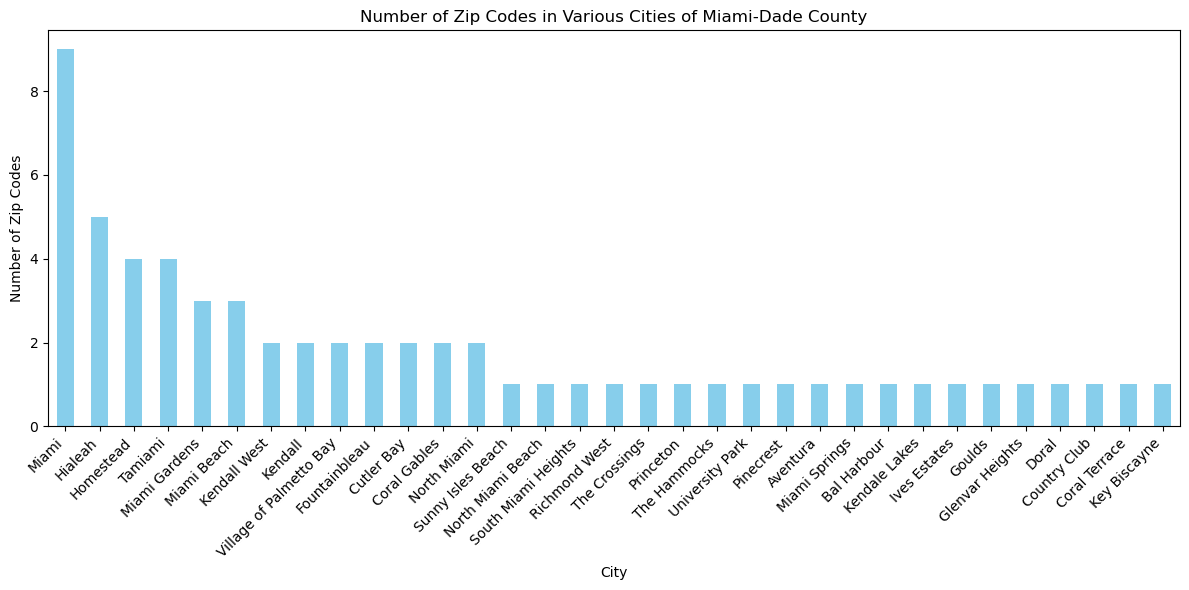

In [13]:
# Group the DataFrame by 'City' and count the number of zip codes in each city
zipcode_counts = new_df.groupby('City')['Zipcode'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
zipcode_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Zip Codes in Various Cities of Miami-Dade County')
plt.xlabel('City')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The above visualization shows that Miami has the highest number of Zipcode distributions.

#### 2.6 filtering the dataframe to include only zip codes with median house prices under 300,000 dollars.

Filtering the dataframe to include only zip codes with median house prices under 300,000 is essential because it aligns with the budget constraints of the client. By focusing on properties within this price range, the analysis becomes more relevant and actionable for the client's investment objectives.

In [14]:
# Filter the DataFrame to include only zip codes with median house prices under $300,000
budget_df = new_df[new_df['2018-04'] < 300000]
budget_df

RegionID Zipcode                 City State                  Metro  \
838      72428   33125                Miami    FL  Miami-Fort Lauderdale   
907      72371   33033            Homestead    FL  Miami-Fort Lauderdale   
1176     72429   33126                Miami    FL  Miami-Fort Lauderdale   
1233     72464   33161          North Miami    FL  Miami-Fort Lauderdale   
1398     72479   33177  South Miami Heights    FL  Miami-Fort Lauderdale   
2062     72348   33010              Hialeah    FL  Miami-Fort Lauderdale   
2068     72370   33032            Princeton    FL  Miami-Fort Lauderdale   
2451     72472   33169        Miami Gardens    FL  Miami-Fort Lauderdale   
2458     72465   33162    North Miami Beach    FL  Miami-Fort Lauderdale   
2869     72387   33055        Miami Gardens    FL  Miami-Fort Lauderdale   
3794     72388   33056        Miami Gardens    FL  Miami-Fort Lauderdale   
4146     72368   33030            Homestead    FL  Miami-Fort Lauderdale   
5090     72491   33189           Cutler Bay    FL  Miami-Fort Lauderdale   
7277     72373   33035            Homestead    FL  Miami-Fort Lauderdale   
7663     72492   33190           Cutler Bay    FL  Miami-Fort Lauderdale   
8156     72473   33170               Goulds    FL  Miami-Fort Lauderdale   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
838   Miami-Dade       839   98700.0   98700.0   98700.0  ...   266400   
907   Miami-Dade       908   77100.0   77300.0   77400.0  ...   197900   
1176  Miami-Dade      1177  108600.0  108800.0  109100.0  ...   283600   
1233  Miami-Dade      1234   85800.0   85800.0   85800.0  ...   270700   
1398  Miami-Dade      1399   91200.0   91200.0   91100.0  ...   262900   
2062  Miami-Dade      2063  100300.0  100900.0  101500.0  ...   260500   
2068  Miami-Dade      2069   87600.0   87400.0   87300.0  ...   222500   
2451  Miami-Dade      2452   82900.0   82900.0   82900.0  ...   223900   
2458  Miami-Dade      2459   82300.0   82400.0   82500.0  ...   238800   
2869  Miami-Dade      2870   73000.0   73000.0   73000.0  ...   229600   
3794  Miami-Dade      3795   71200.0   71300.0   71300.0  ...   210600   
4146  Miami-Dade      4147   76700.0   76600.0   76500.0  ...   195100   
5090  Miami-Dade      5091   92600.0   92600.0   92600.0  ...   263600   
7277  Miami-Dade      7278   86400.0   86500.0   86700.0  ...   178300   
7663  Miami-Dade      7664  102000.0  102000.0  102000.0  ...   249100   
8156  Miami-Dade      8157   89500.0   89300.0   89000.0  ...   247100   

      2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
838    267200   267800   268000   269000   270800   272400   275100   279700   
907    200200   203000   205900   207900   209700   212000   214800   218300   
1176   285300   288100   291000   292900   294300   295700   296900   298200   
1233   273000   275200   277600   278800   281000   284700   287800   289400   
1398   265100   268000   270600   272000   273900   276600   279000   280800   
2062   266200   272000   276400   279000   281500   284400   286100   287100   
2068   225000   227500   229900   231400   232800   234500   235500   236600   
2451   226800   230000   233900   237300   239800   242500   244400   246000   
2458   241300   244300   247500   250000   252100   254800   258000   261300   
2869   233000   236500   239800   242000   243900   247200   250300   252300   
3794   214300   218100   221200   222700   224400   227000   228500   229300   
4146   200100   204200   206400   207600   209200   211100   212700   214300   
5090   266700   270100   272600   273500   274500   276200   277800   279400   
7277   180600   183500   186700   188100   189300   190600   192700   195500   
7663   251900   254400   255700   255500   255400   256400   256800   256600   
8156   249700   252500   254300   254700   255800   257700   259300   261800   

      2018-04  
838    282900  
907    220800  
1176   298800  
1233   289800  
1398   282000

#### 2.7 How many zipcodes are in each city?
his information is crucial for several reasons:

. Market Understanding: It helps investors understand the breadth and depth of the real estate market in each city. Cities with a higher number of zip codes may indicate a larger market size or more diverse housing options.

. Investment Focus: Knowing the distribution of zip codes allows investors to focus their attention on specific cities or areas within Miami-Dade County that offer the most potential for investment. They can prioritize areas with a higher concentration of zip codes for further analysis and investment consideration.

. Market Dynamics: Disparities in the number of zip codes among cities can reveal underlying market dynamics such as population density, economic activity, and development trends. Cities with more zip codes may experience higher market competition or greater demand for real estate.

. Risk Assessment: Understanding the distribution of zip codes helps in assessing investment risks. It allows investors to diversify their portfolio by investing in multiple cities or areas with different market characteristics, reducing exposure to localized risks.



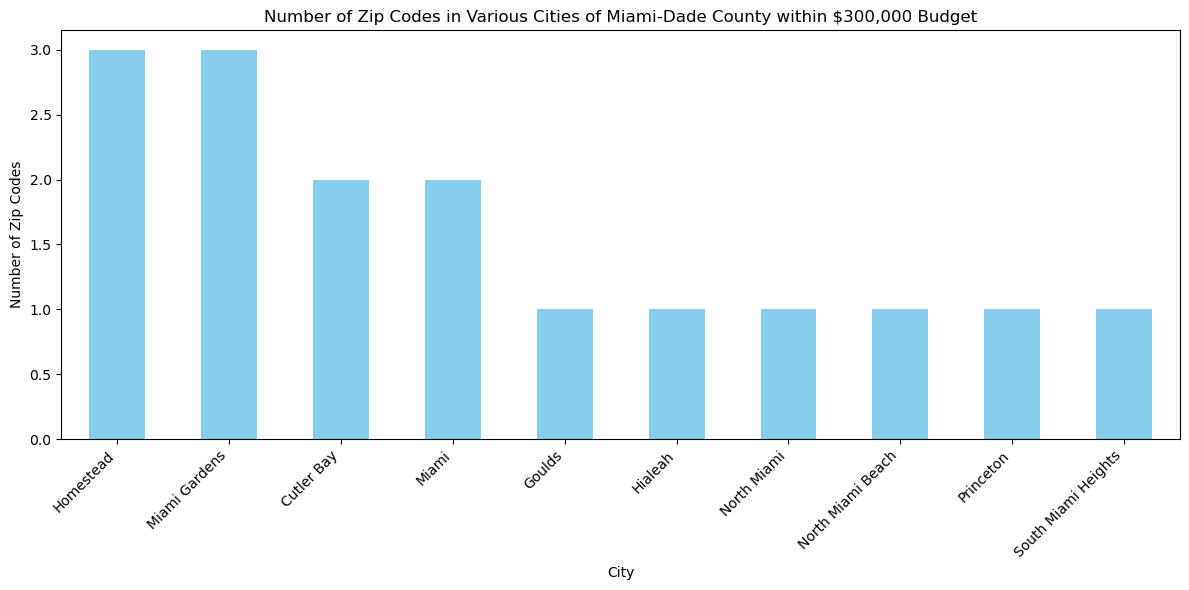

In [15]:
# Group the DataFrame by 'City' and count the number of zip codes in each city
zipcode_counts = budget_df.groupby('City')['Zipcode'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
zipcode_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Zip Codes in Various Cities of Miami-Dade County within $300,000 Budget')
plt.xlabel('City')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#save the figure
plt.savefig('Zipcode_distrbution.png')

#show the plot
plt.show()


The above is a list of cities that fall under our clients budget of 300,000 dollars.With homestead and miami gardens having the highest number of zipcodes.

# Step 3: EDA and Visualization

#### 3.1 What is the price history of the MiamiDade county since 1996?

now to answer this question there are a few steps we will need to do:
1.Our data is currently in a wide format (each column representing a different time period), you may want to melt it into a long format where each row represents a unique observation (combination of date and zipcode).

2.For time series visualization, it's beneficial to have the date as the index column of your DataFrame. This makes it easier to plot the data over time.

Lets begin.



In [16]:
melted_df = pd.melt(budget_df, 
                    id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], 
                    var_name='Date', 
                    value_name='Price')

# Display the melted DataFrame
melted_df.head()

RegionID Zipcode                 City State                  Metro  \
0     72428   33125                Miami    FL  Miami-Fort Lauderdale   
1     72371   33033            Homestead    FL  Miami-Fort Lauderdale   
2     72429   33126                Miami    FL  Miami-Fort Lauderdale   
3     72464   33161          North Miami    FL  Miami-Fort Lauderdale   
4     72479   33177  South Miami Heights    FL  Miami-Fort Lauderdale   

   CountyName  SizeRank     Date     Price  
0  Miami-Dade       839  1996-04   98700.0  
1  Miami-Dade       908  1996-04   77100.0  
2  Miami-Dade      1177  1996-04  108600.0  
3  Miami-Dade      1234  1996-04   85800.0  
4  Miami-Dade      1399  1996-04   91200.0

In [17]:
#set date as dataset index
melted_df['Date'] = pd.to_datetime(melted_df['Date'])  # Convert 'Date' column to datetime format
melted_df.set_index('Date', inplace=True)  # Set 'Date' column as the index

# Check the index to confirm it's set correctly
melted_df.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=4240, freq=None)

In [18]:
melted_df

RegionID Zipcode                 City State  \
Date                                                      
1996-04-01     72428   33125                Miami    FL   
1996-04-01     72371   33033            Homestead    FL   
1996-04-01     72429   33126                Miami    FL   
1996-04-01     72464   33161          North Miami    FL   
1996-04-01     72479   33177  South Miami Heights    FL   
...              ...     ...                  ...   ...   
2018-04-01     72368   33030            Homestead    FL   
2018-04-01     72491   33189           Cutler Bay    FL   
2018-04-01     72373   33035            Homestead    FL   
2018-04-01     72492   33190           Cutler Bay    FL   
2018-04-01     72473   33170               Goulds    FL   

                            Metro  CountyName  SizeRank     Price  
Date                                                               
1996-04-01  Miami-Fort Lauderdale  Miami-Dade       839   98700.0  
1996-04-01  Miami-Fort Lauderdale  Miami-Dade       908   77100.0  
1996-04-01  Miami-Fort Lauderdale  Miami-Dade      1177  108600.0  
1996-04-01  Miami-Fort Lauderdale  Miami-Dade      1234   85800.0  
1996-04-01  Miami-Fort Lauderdale  Miami-Dade      1399   91200.0  
...                           ...         ...       ...       ...  
2018-04-01  Miami-Fort Lauderdale  Miami-Dade      4147  215600.0  
2018-04-01  Miami-Fort Lauderdale  Miami-Dade      5091  280800.0  
2018-04-01  Miami-Fort Lauderdale  Miami-Dade      7278  197700.0  
2018-04-01  Miami-Fort Lauderdale  Miami-Dade      7664  256600.0  
2018-04-01  Miami-Fort Lauderdale  Miami-Dade      8157  264400.0  

[4240 rows x 8 columns]

#### Q1.What are the historical trends in property values and ROI in Miami-Dade County, as highlighted in the articles?

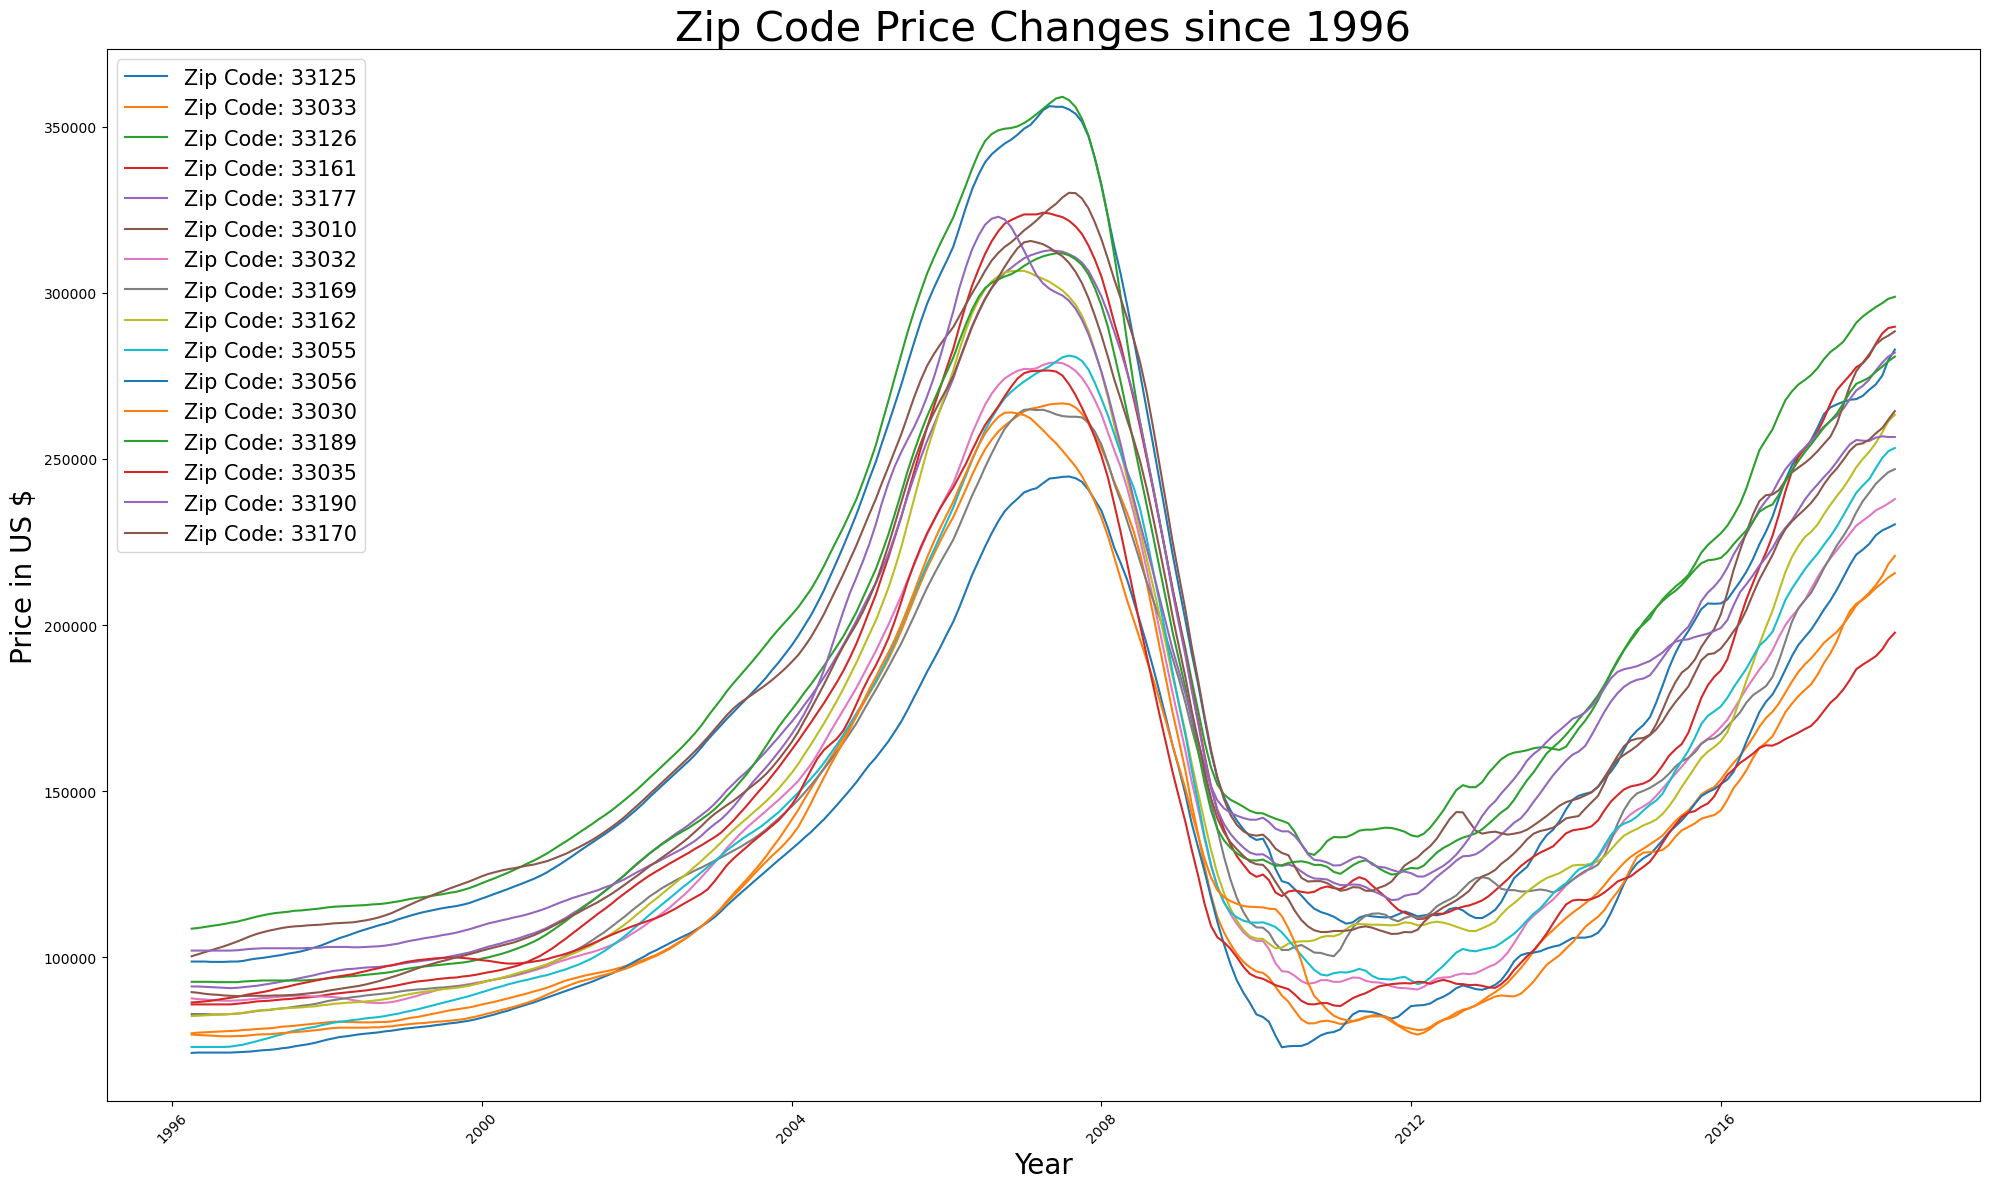

In [19]:
zip_dict = {}

for zipcode in melted_df['Zipcode'].unique():
    zip_dict[zipcode] = melted_df[melted_df['Zipcode'] == zipcode]['Price']

fig, ax = plt.subplots(figsize=(20, 12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode], label=f'Zip Code: {zipcode}')



ax.set_title('Zip Code Price Changes since 1996', fontsize=30)
ax.set_ylabel('Price in US $', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.legend(prop={'size': 15})
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('Zipcode_price_changes.png')

#show plot
plt.show()


From the visualization above, it's evident that there was a peak in housing prices just before the recession hit in 2008. This recession led to a significant decline in housing prices, but since around 2011, we've observed a gradual recovery with prices steadily rising. However, it's noteworthy that as of the latest data, housing prices have yet to reach the peak levels observed in 2007 before the recession occurred.

#### Q2.Which zip code/s exhibits the most substantial growth post-2007 recession, aligning with our objective of identifying the best-growing zip codes while minimizing risks associated with economic downturns such as recessions?

for us to get this information we begin by calculation %ROI and plotting the same.

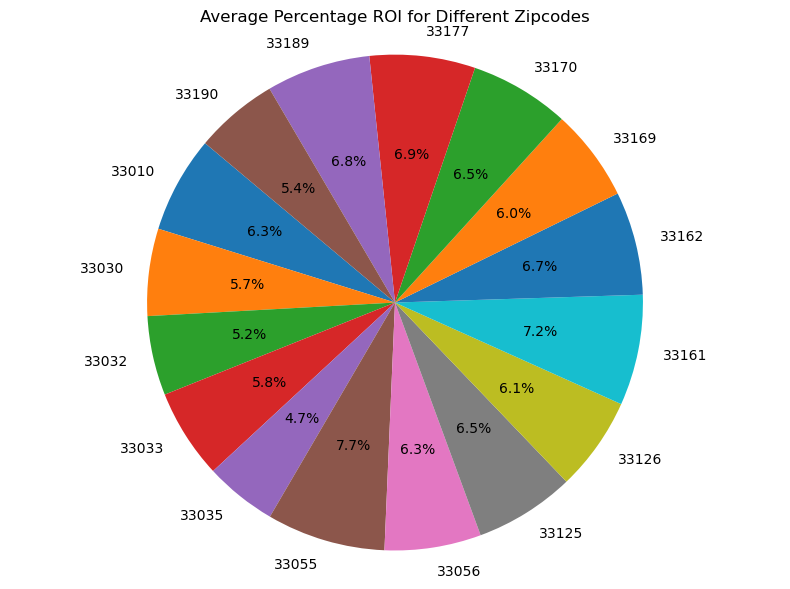

In [20]:
# Calculate ROI for melted_df
melted_df['ROI'] = ((melted_df['Price'] - melted_df.groupby('Zipcode')['Price'].transform('first')) / melted_df.groupby('Zipcode')['Price'].transform('first')) * 100

# Calculate mean ROI for each Zipcode
zipcode_roi = melted_df.groupby('Zipcode')['ROI'].mean()

# Calculate %ROI and save it as a new column
melted_df['%ROI'] = zipcode_roi.reindex(melted_df['Zipcode']).values

# Calculate ROI price and save it as a new column
melted_df['ROI Price'] = melted_df['Price'] * (melted_df['%ROI'] / 100)

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(zipcode_roi, labels=zipcode_roi.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Percentage ROI for Different Zipcodes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save figure
plt.savefig('Average_percentage_ROI.png')

# Show the plot
plt.show()


The above pie plot shows the zipcodes that had the highest steady growth after emerging from the 2007 recession.the order goes as follows;

1.zipcode 33055 had a percentage ROI of 7.7%

2.zipcode 33161 had a percentage ROI of 7.2%

3.zipcode 33177 had a percentage ROI of 6.9%

4.zipcode 33189 had a percentage ROI of 6.8%

5.zipcode 33162 had a percentage ROI of 6.7%

these are the 5 best perfoming Zipcodes. 


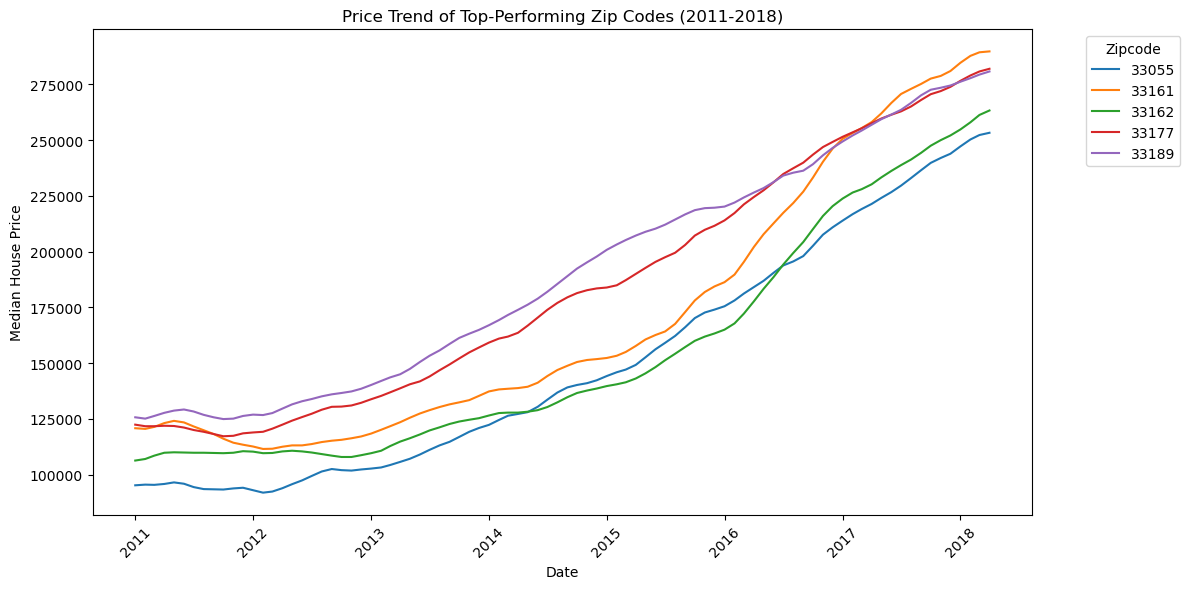

In [21]:
# Filter the data for the selected zip codes and time period
selected_zipcodes = ['33055', '33161', '33177', '33189', '33162']
start_date = '2011-01-01'
end_date = '2018-12-31'

filtered_df = melted_df[(melted_df['Zipcode'].isin(selected_zipcodes)) & 
                        (melted_df.index >= start_date) & 
                        (melted_df.index <= end_date)]

# Plot the trend of each zip code
plt.figure(figsize=(12, 6))
for zipcode, data in filtered_df.groupby('Zipcode'):
    plt.plot(data.index, data['Price'], label=zipcode)

plt.title('Price Trend of Top-Performing Zip Codes (2011-2018)')
plt.xlabel('Date')
plt.ylabel('Median House Price')
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('Top_zipcodes_price_trend.png')

#show plot
plt.show()


After we are done filtering and ranking the zipcodes that met all the criteria required by the client we ended with the below zipcodes.We again can recognise that zipcode 33189 had the best steady growth among all 5 zipcodes. 

# Step 4: Data preprocessing for the selected top 5 zipcodes.

Before fitting the a basic ARIMA model further data preprocessing needs to take place.When working with time series models, it's crucial to assume that the data is stationary. This assumption implies that the mean, variance, and autocorrelation of the data remain constant over time for each lag.

Stationary time series data is essential for efficient model development. Prior to modeling, a thorough assessment of data stationarity will be conducted using the following methods:

Dickey-Fuller Test: The Dickey-Fuller test will be employed to assess the stationarity of the data. This statistical test helps determine if a unit root is present in the series, which is indicative of non-stationarity.

Rolling Mean Analysis: Additionally, a rolling mean analysis will be performed. This involves calculating the mean over a sliding window of observations. Fluctuations in the rolling mean indicate non-stationarity.

In cases where the data is identified as non-stationary, a differencing technique will be applied. Differencing involves computing the difference between consecutive observations. This process helps transform the data into a stationary form, enabling more accurate modeling and analysis.

#### 4.1 create a new dataframe with the topfive zipcodes.
this step is important for the following reasons.Consolidate the filtered data into a single dataframe making it easier to work with and analyse.Another reason is dat integrity by creating a separate dataframe w preserve the original filtered and grouped data ensuring that further amnipulation and analysis performance on final_df doesnt affect original data.Finally ease of access to the data that has  been filtered, grouped, and processed according to specific criteria. This makes it convenient for further analysis or visualization tasks.

In [22]:
# Drop the remaining zip codes
melted_df = melted_df[melted_df['Zipcode'].isin(['33055', '33161', '33177', '33189', '33162'])]

# Round off the ROI price column to 1 decimal point
melted_df['ROI Price'] = melted_df['ROI Price'].round(1)

#round off %ROI column to 1 decimal point 
melted_df['%ROI'] = melted_df['%ROI'].round(1)

# Drop the ROI column
melted_df.drop(columns=['ROI'], inplace=True)

# Filter data for the specified date range from 2012 onwards
start_year = '2011-01-01'
filtered_df = melted_df[melted_df.index >= start_year]

# Group data by date and zipcode, and calculate the mean price for each group
grouped_5 = filtered_df.groupby(['Date', 'Zipcode']).mean().reset_index()

# Display the resulting DataFrame
final_df = grouped_5
final_df.head()

Date Zipcode  RegionID  SizeRank     Price  %ROI  ROI Price
0 2011-01-01   33055   72387.0    2870.0   95200.0  99.2    94428.4
1 2011-01-01   33161   72464.0    1234.0  120800.0  92.6   111864.2
2 2011-01-01   33162   72465.0    2459.0  106300.0  86.4    91890.9
3 2011-01-01   33177   72479.0    1399.0  122400.0  88.3   108060.7
4 2011-01-01   33189   72491.0    5091.0  125700.0  87.1   109500.2

For one to perform a stationarity and seasonality test,we need to drop columns that are not relevant to the analysis or are redundant.In the above dataframe the following are the columns that are needed to be dropped:
RegionID: This column likely represents some identifier and is not relevant for the analysis.

City, State, Metro, and CountyName: These columns provide location information that is not necessary for the analysis of stationarity and seasonality.

SizeRank: This column also appears to be an identifier or ranking that is not needed for the analysis.

%ROI: This column represents the percentage return on investment, which is not relevant for stationarity and seasonality testing

#### 4.2 Drop unnecessary columns

In [23]:
# Drop the unnecessary columns without inplace=True
time_series = final_df.drop(columns=['RegionID', 'SizeRank', '%ROI', 'ROI Price'])

# Set the index to 'Date'
time_series.set_index('Date', inplace=True)

print('Time series data for the 5 zipcodes:\n', time_series.head())


Time series data for the 5 zipcodes:
            Zipcode     Price
Date                        
2011-01-01   33055   95200.0
2011-01-01   33161  120800.0
2011-01-01   33162  106300.0
2011-01-01   33177  122400.0
2011-01-01   33189  125700.0


In [24]:
time_series.isnull().sum()

Zipcode    0
Price      0
dtype: int64

#### 4.3 Stationarity Test

In [25]:
# Create individualized time series for each zipcode.
# List containing the 5 different time series.
df_ts = []
for zipcode in time_series.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = time_series[time_series['Zipcode'] == zipcode].asfreq('MS')
    df_ts.append(df_zip)
    print('\nZipcode', zipcode, 'time_series:')
    print(df_zip.head())



Zipcode 33055 time_series:
           Zipcode    Price
Date                       
2011-01-01   33055  95200.0
2011-02-01   33055  95500.0
2011-03-01   33055  95400.0
2011-04-01   33055  95800.0
2011-05-01   33055  96500.0

Zipcode 33161 time_series:
           Zipcode     Price
Date                        
2011-01-01   33161  120800.0
2011-02-01   33161  120500.0
2011-03-01   33161  121400.0
2011-04-01   33161  123100.0
2011-05-01   33161  124100.0

Zipcode 33162 time_series:
           Zipcode     Price
Date                        
2011-01-01   33162  106300.0
2011-02-01   33162  107000.0
2011-03-01   33162  108500.0
2011-04-01   33162  109800.0
2011-05-01   33162  110000.0

Zipcode 33177 time_series:
           Zipcode     Price
Date                        
2011-01-01   33177  122400.0
2011-02-01   33177  121700.0
2011-03-01   33177  121700.0
2011-04-01   33177  121900.0
2011-05-01   33177  121800.0

Zipcode 33189 time_series:
           Zipcode     Price
Date                      

Before applying the ADF test, it's important to visually inspect the time series plots for any obvious trends, seasonality, or non-stationary behavior. The plot of monthly returns can help in this visual inspection. 

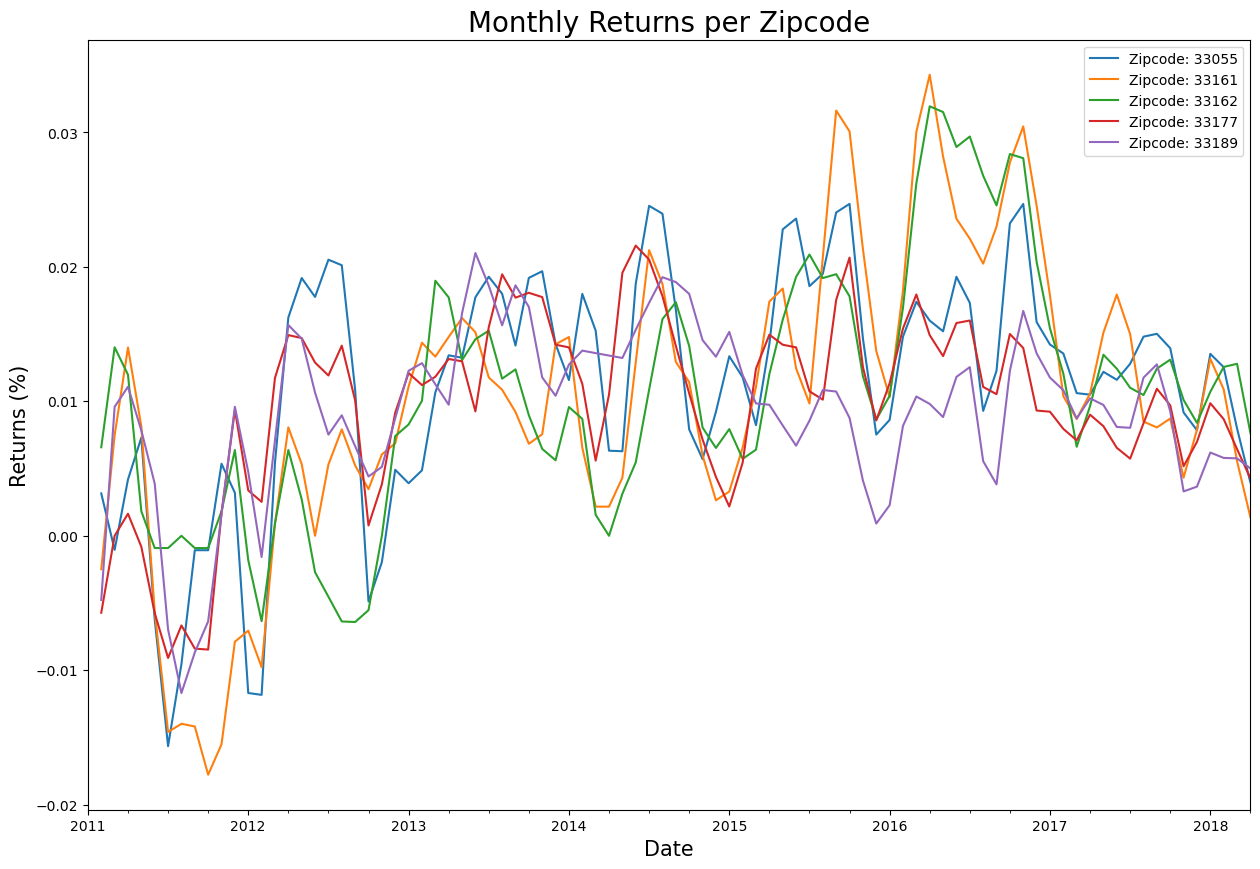

In [26]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1

#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best') 

The plot above does not provide a clear insight to whether the data has stationarity.rather the data seems to be non_stationary.which is an assumption to build the model. A helpful visualization is to plot the monthly returns along with its rolling mean and standard deviation which should not display a trend for the data to be stationary.we will proceed to investigate further.

#### 4.1.1 Rolling Mean and Standard Deviation 

ADF Test Results for Zipcode: 33055
Test Statistic: -3.8925291753510463
p-Value: 0.002090521405622518
Used Lags: 12
Observations: 74
Critical Values:
   1%: -3.5219803175527606
   5%: -2.9014701097664504
   10%: -2.58807215485756


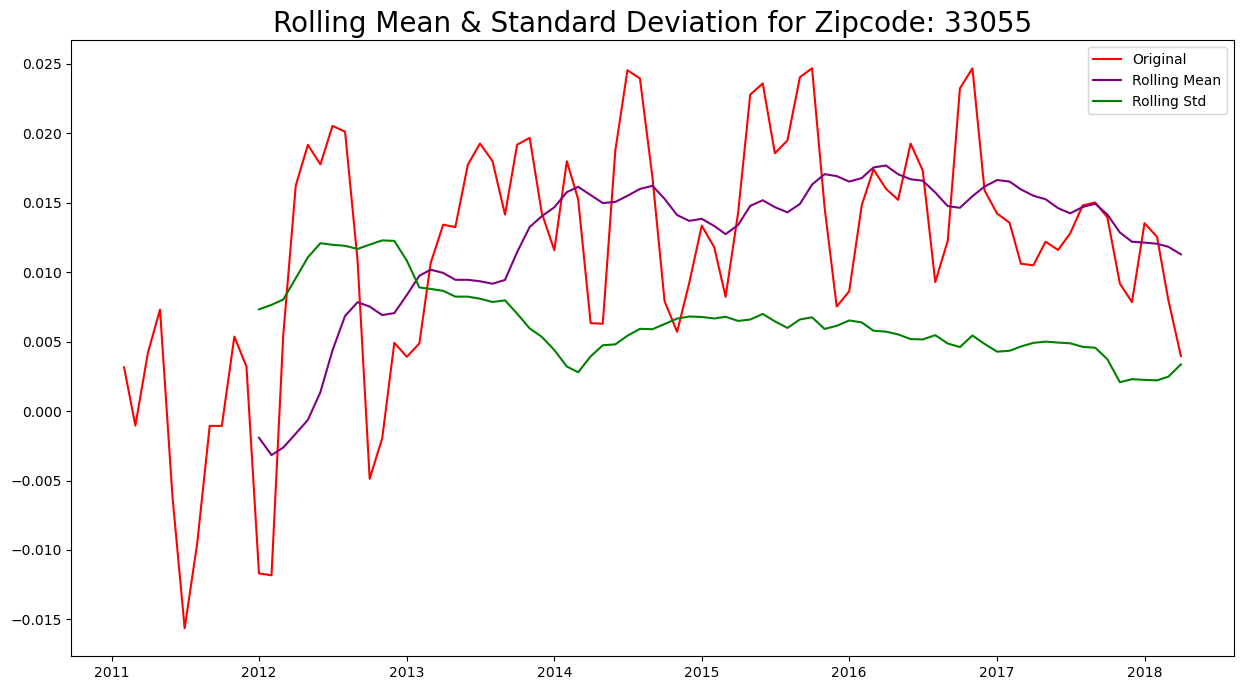

ADF Test Results for Zipcode: 33161
Test Statistic: -2.123031108239496
p-Value: 0.23535507899830538
Used Lags: 6
Observations: 80
Critical Values:
   1%: -3.5148692050781247
   5%: -2.8984085156250003
   10%: -2.58643890625


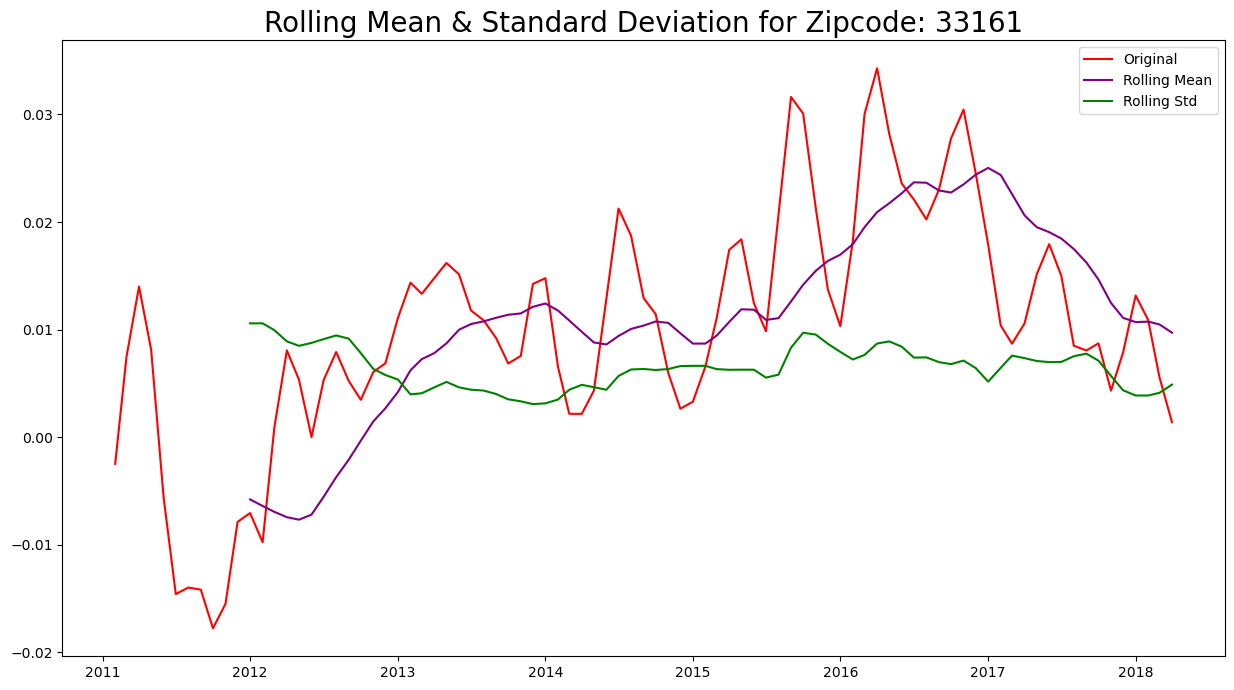

ADF Test Results for Zipcode: 33162
Test Statistic: -2.0079400743840217
p-Value: 0.2831025419879196
Used Lags: 4
Observations: 82
Critical Values:
   1%: -3.512738056978279
   5%: -2.8974898650628984
   10%: -2.585948732897085


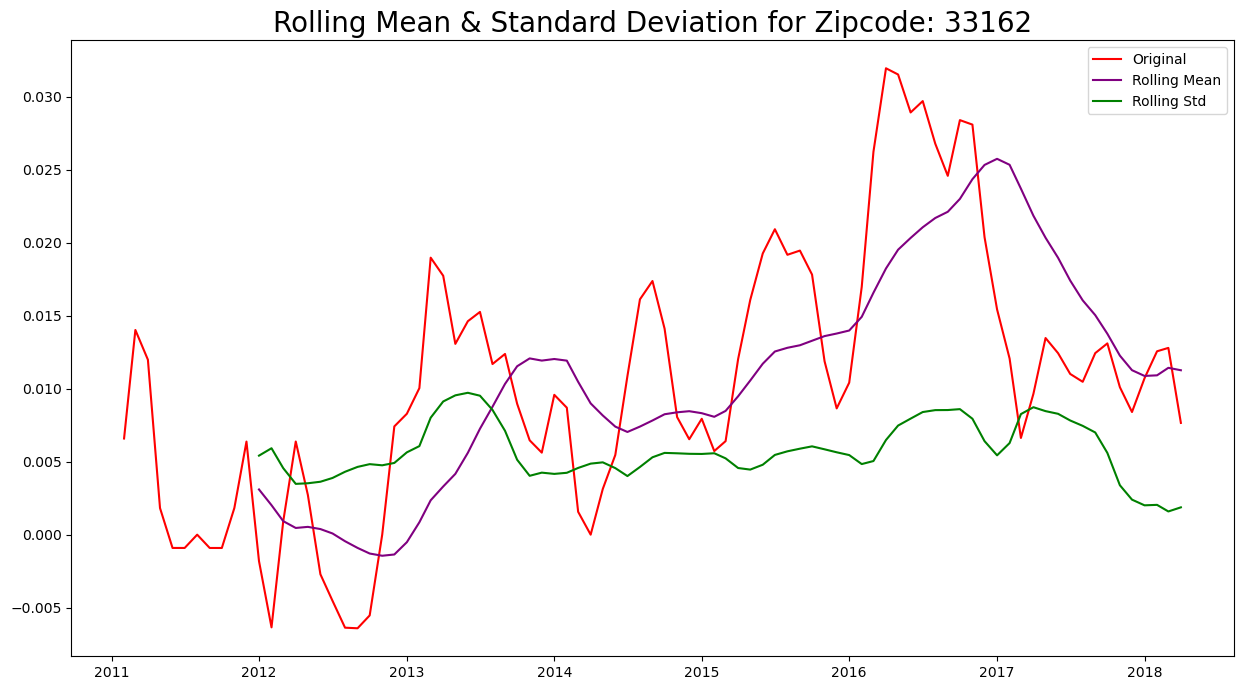

ADF Test Results for Zipcode: 33177
Test Statistic: -2.894182075429102
p-Value: 0.046028737888330916
Used Lags: 3
Observations: 83
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153


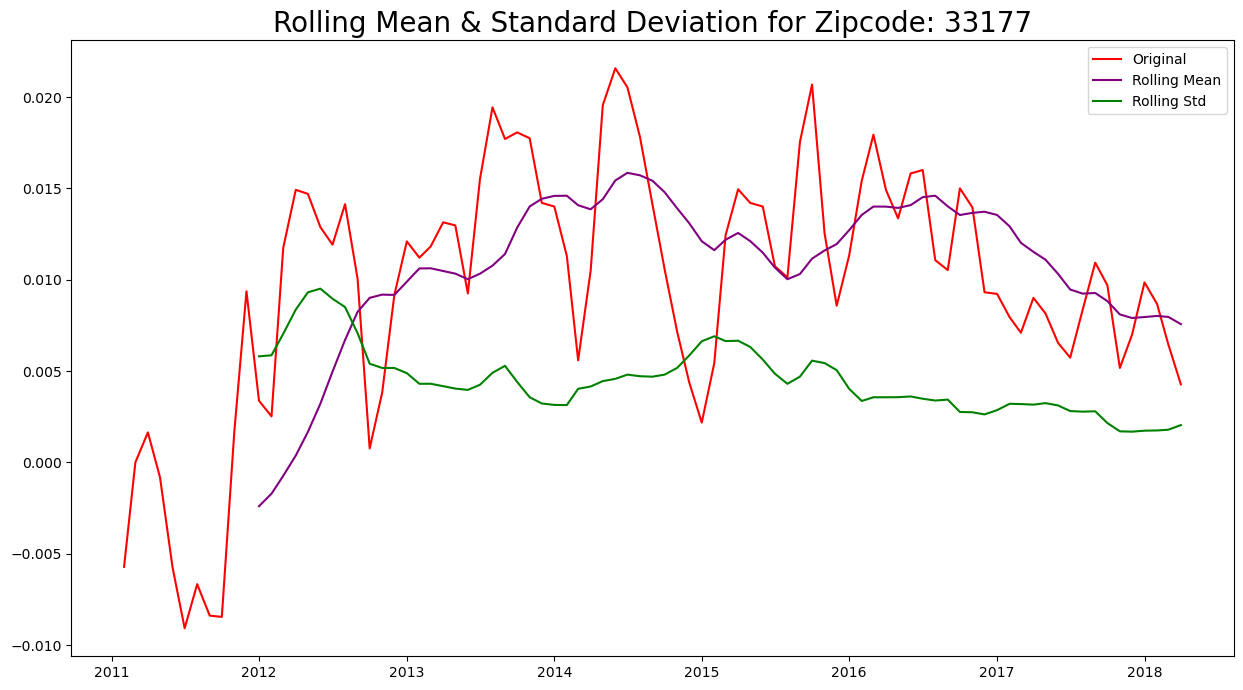

ADF Test Results for Zipcode: 33189
Test Statistic: -2.6255596515991027
p-Value: 0.08782882808376169
Used Lags: 3
Observations: 83
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153


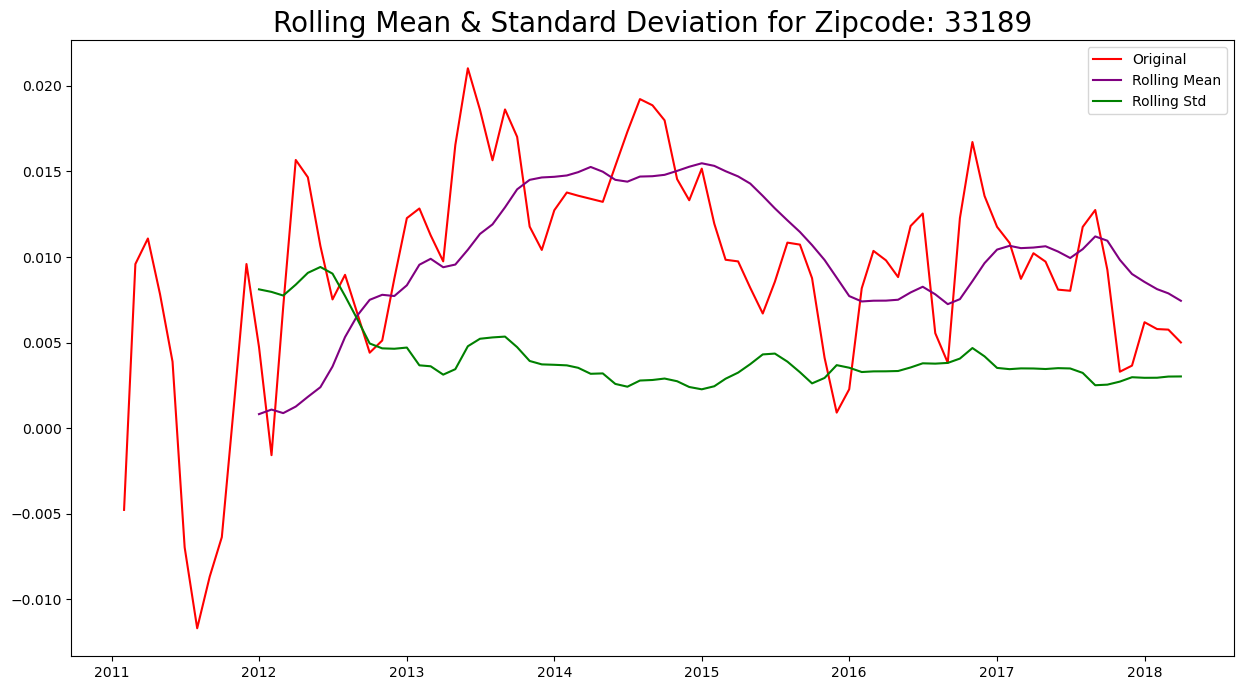

In [27]:
# Testing for stationarity of the zipcodes
# Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window=12, center=False).mean()
    rollingstd = df_ts[i].ret.rolling(window=12, center=False).std()
    fig = plt.figure(figsize=(15, 8))
    original = plt.plot(df_ts[i].ret, color="red", label="Original")
    mean = plt.plot(rollingmean, color="purple", label="Rolling Mean")
    std = plt.plot(rollingstd, color="green", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}', fontsize=20)

    # Perform ADF test
    adf_result = adfuller(df_ts[i].ret.dropna())
    print('ADF Test Results for Zipcode:', df_ts[i].Zipcode[0])
    print('Test Statistic:', adf_result[0])
    print('p-Value:', adf_result[1])
    print('Used Lags:', adf_result[2])
    print('Observations:', adf_result[3])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

    plt.show()

For Zipcodes 33161, 33177, 33162, and 33189: The p-values are greater than 0.05, indicating that we fail to reject the null hypothesis at a 5% significance level. Therefore, we cannot conclude that these series are stationary.

For Zipcodes 33055: The p-value is very small (0.001), indicating strong evidence against the null hypothesis. However, a visual inspection is not accurate enough to just rely on it and proceed with fitting an ARIMA model. Therefore, it is necessary to perform an Augmented Dickey-Fuller test for stationarity.


#### 4.1.2 Augmented Dickey-Fuller Test
The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary or not.To perform the Dickey-Fuller test in Python, you can use the adfuller function from the statsmodels library.

In [28]:
# performing Dicky-fuller test for stationarity

for i in range(5):
    results = adfuller(df_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])

    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 33055
p-value: 0.002090521405622518
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 33161
p-value: 0.23535507899830538
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 33162
p-value: 0.2831025419879196
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 33177
p-value: 0.046028737888330916
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 33189
p-value: 0.08782882808376169
Fail to reject the null hypothesis. Data is not stationary.



##### Null hypothesis(the series is stationary);
For Zipcode 33161: Test Statistic is -1.698, which is greater than the critical values at all significance levels (1%, 5%, and 10%). This suggests that we fail to reject the null hypothesis, indicating that the series is non-stationary.

For Zipcodes 33177, 33162, and 33189: Test Statistic is 0.242, -0.382, and -0.019 respectively. In each case, the test statistic is greater than the critical values, indicating non-stationarity.

For Zipcode 33055: Test Statistic is 1.924, which is less than the critical values at all significance levels. This suggests rejecting the null hypothesis, indicating that the series is stationary.

We need our series to be stationary for modeling. we now go a step further and perform differencing.

#### 4.1.3 Differencing

Is often applied to achieve stationarity by removing trends or seasonal components from the time series data. If the original series is non-stationary (which is the case for zip codes 33161 33177, 33162, and 33189), differencing is necessary to make the series stationary before further analysis or modeling.

In [29]:
# Differencing the non-stationary zip codes
for i in [0,1,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(df_ts[i].ret.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])

    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 33055
p-value: 2.2899885067099626e-05
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 33161
p-value: 0.004067578373100865
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 33162
p-value: 1.407721229211628e-06
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 33177
p-value: 0.0010520832541380642
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 33189
p-value: 0.04929946390017921
Reject the null hypothesis. Data is stationary.



After differencing we note a marked improvement that all data is stationary.

# Step 5: Modelling

Befoe modelling we need to save the new time series data.This code below saves the time series data after differencing for each zipcode to separate files. 

In [30]:
# For Zipcode 33055
ts_33055 = df_ts[0].ret.dropna()

# For Zipcode 33161
ts_33161 = df_ts[1].ret.diff().dropna()

# For Zipcode 33162
ts_33162 = df_ts[2].ret.diff().dropna()

# For Zipcode 33177
ts_33177 = df_ts[3].ret.dropna()

# For Zipcode 33189
ts_33189 = df_ts[4].ret.diff().dropna()


#### SARIMA MODEL.
Also known in full Seasonal AutoRegressive Integrated Moving Average.SARIMA models are a powerful tool for time series forecasting, commonly used for time series forecasting especially when dealing with data that exhibits both trend and seasonal patterns.It has the capability to handle seasonality which is what data from Zipcode 33161 has after differencing time series and going a step further and executing seasonal differencing with no change. 

NOTE;When using SARIMA models for time series forecasting, it's essential to identify and specify the appropriate seasonal parameters (such as seasonal period and seasonal AR, I, and MA orders) based on the characteristics of the data. Once the SARIMA model is fitted to the historical data, it can be used to generate forecasts for future time periods.

Below is a justification for using SARIMA model apart from the reason stated above.Handling Seasonality: SARIMA models are specifically designed to handle time series data that exhibit both trend and seasonal patterns. Since the ROI data for Zipcode 33161 shows clear seasonal patterns even after differencing the time series, SARIMA is well-suited to capture and model these seasonal fluctuations.It also Accomodates trends,Flexible,Statictial accuracy and Forecasting accuracy 



#### 5.1 Basic SARIMA Model.

Using a baseline model first is a necessary approach in time series forecasting as it helps in gaining insights into the data, assessing model performance, and guiding subsequent modeling efforts.

#### 5.1.1 Plot (ACF) and (PACF) 
Autocorrelation function and Partial autocorrelation function is a method use to provide insight into the selection of ones (p,d,q) as well as (p,d,q,s) which are our seasonal orders for a SARIMA model.
Hence why it's generally recommended to visually inspect the ACF and PACF plots to guide the selection process, especially when dealing with complex or ambiguous time series patterns.

For one to determine the maximum lag to plot acf and pacf we first check length of our time series data.This information is crucial for determining the appropriate lag values to use when plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

In [31]:
# Check the length of each time series data
length_ts_33161 = len(ts_33161)
length_ts_33177 = len(ts_33177)
length_ts_33162 = len(ts_33162)
length_ts_33055 = len(ts_33055)
length_ts_33189 = len(ts_33189)

print("Length of ts_33161:", length_ts_33161)
print("Length of ts_33177:", length_ts_33177)
print("Length of ts_33162:", length_ts_33162)
print("Length of ts_33055:", length_ts_33055)
print("Length of ts_33189:", length_ts_33189)


Length of ts_33161: 86
Length of ts_33177: 87
Length of ts_33162: 86
Length of ts_33055: 87
Length of ts_33189: 86


Since the lengths of our series vary slightly, We use a log value that covers at least twice the length of the longest series. In this case, we will use a lag of 30  for plotting ACF and PACF to cover all series adequately.Now, its time to search for seasonality (S) and the AR ( p) and MA (q) parameters of the model that will provide a best fit for each of the zip codes.

The AR and MA parameters can be estimated using the autocorrelation function (ACF) and partial autocorrelation function (PACF)plots of the stationary time series



In [32]:
# defining a function that plots acf and pacf plots
def acf_pacf(df,alags=40,plags=40):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

In [33]:
def plot_acf_pacf_for_series(series, series_name, lags=30):
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Plot ACF
    plot_acf(series, ax=axes[0], lags=lags)
    axes[0].set_title(f'Autocorrelation Function (ACF) for {series_name}')

    # Plot PACF
    plot_pacf(series, ax=axes[1], lags=lags)
    axes[1].set_title(f'Partial Autocorrelation Function (PACF) for {series_name}')

    plt.tight_layout()
    plt.show()

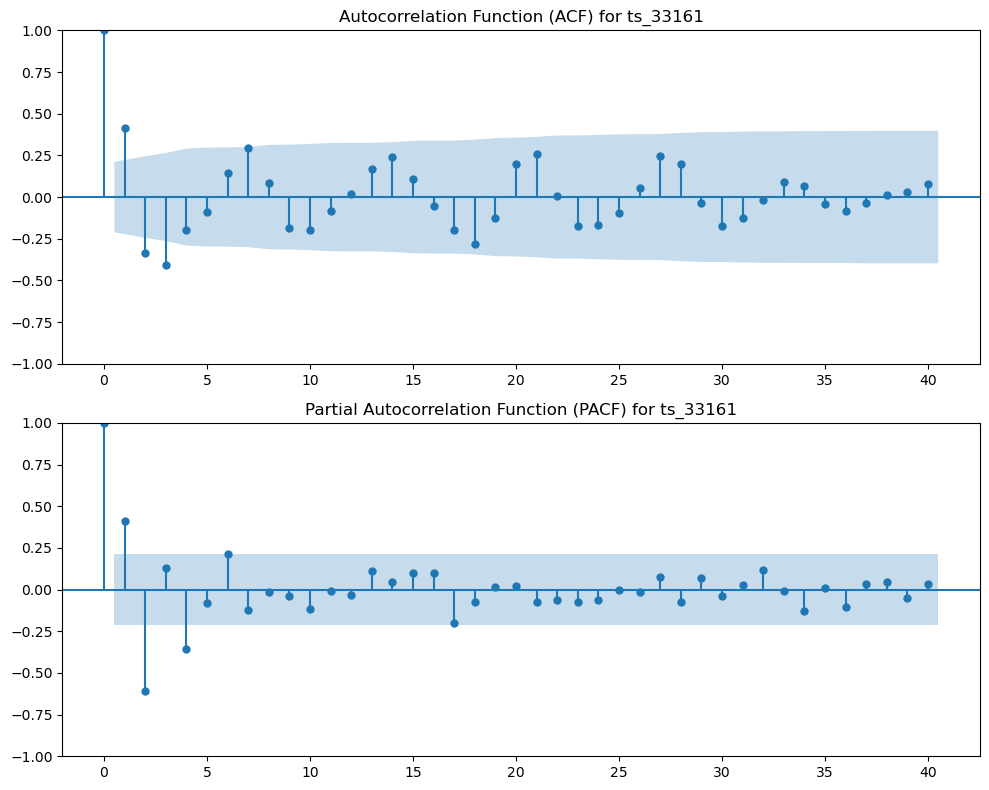

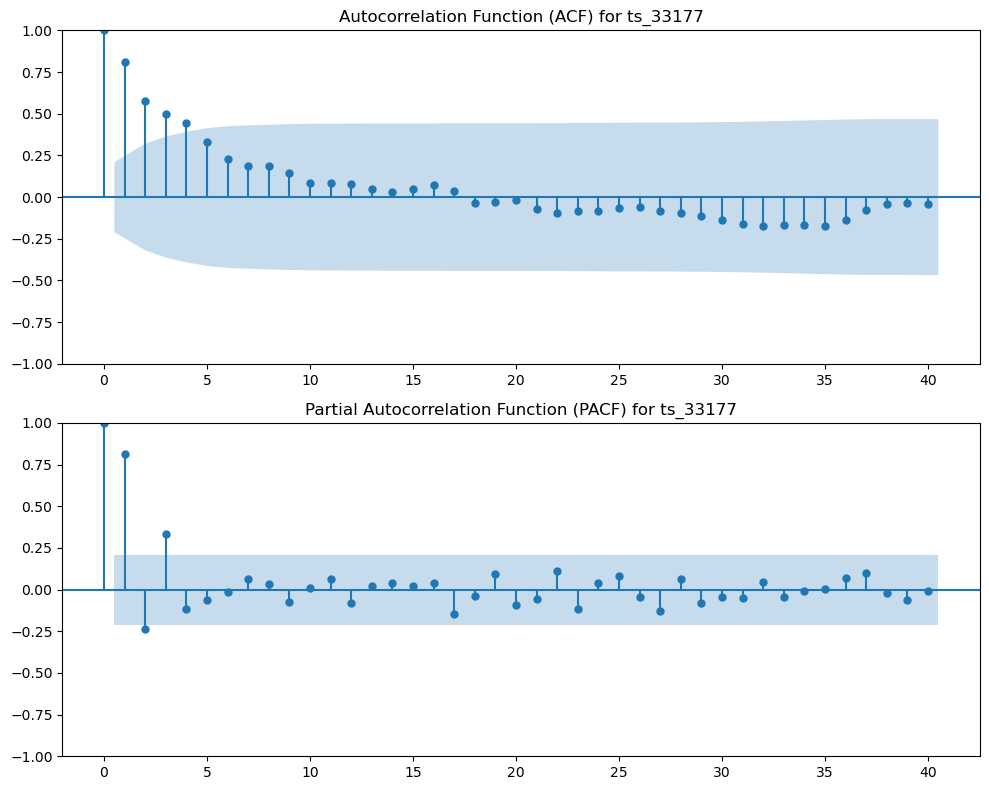

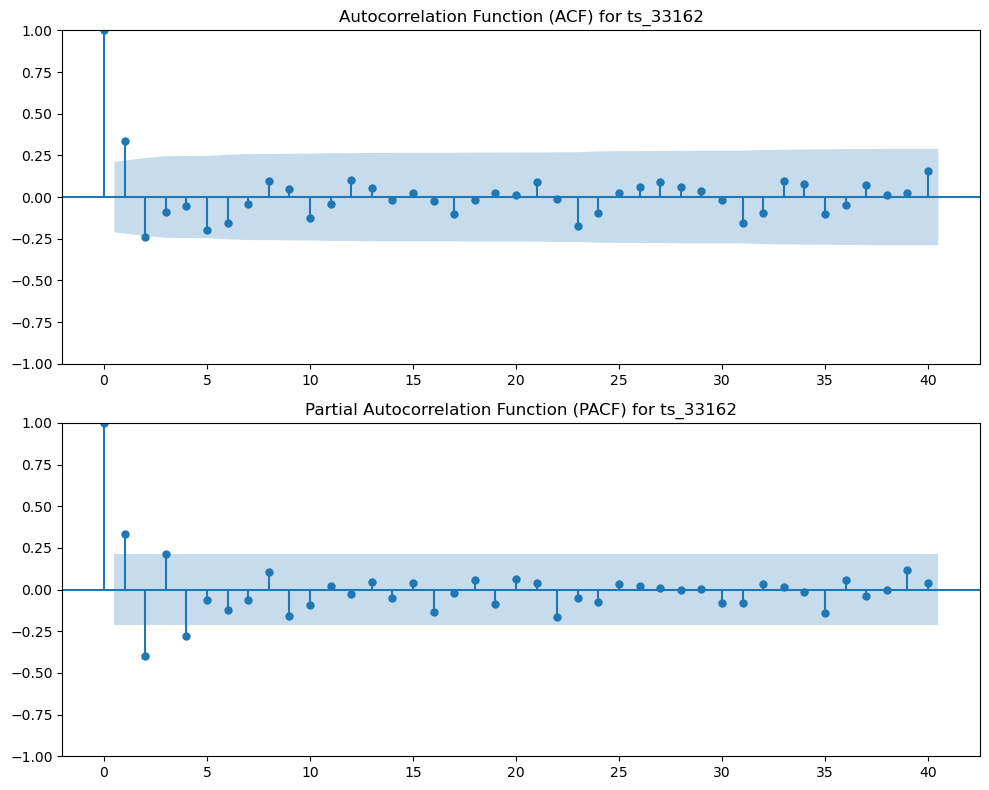

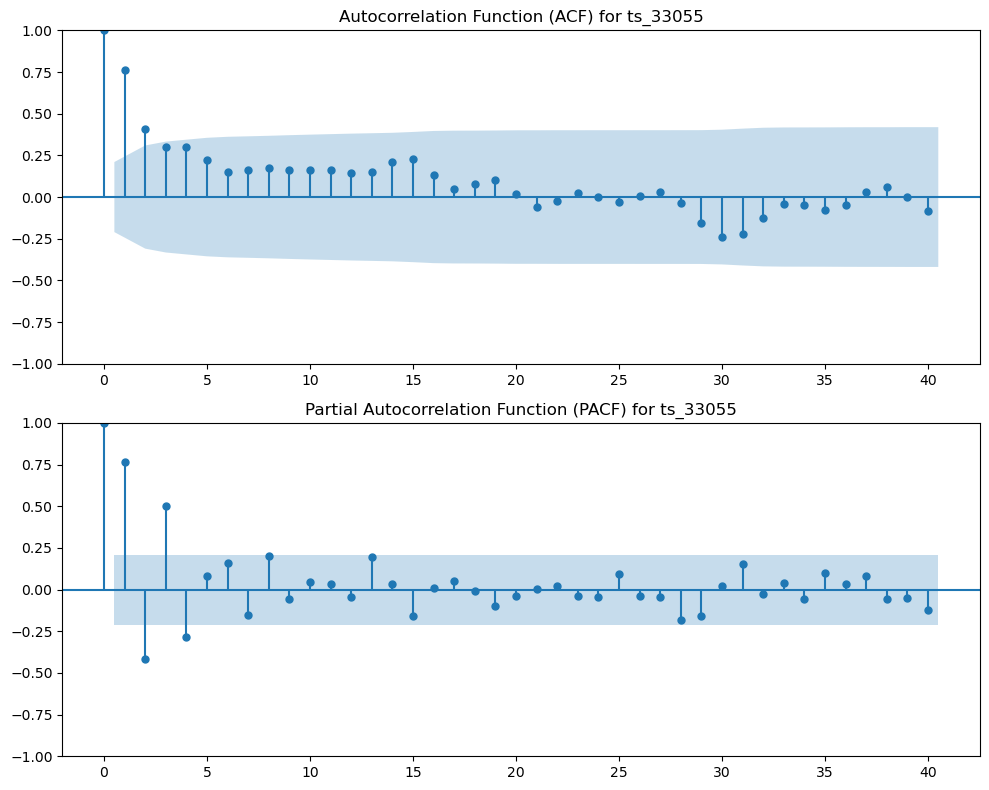

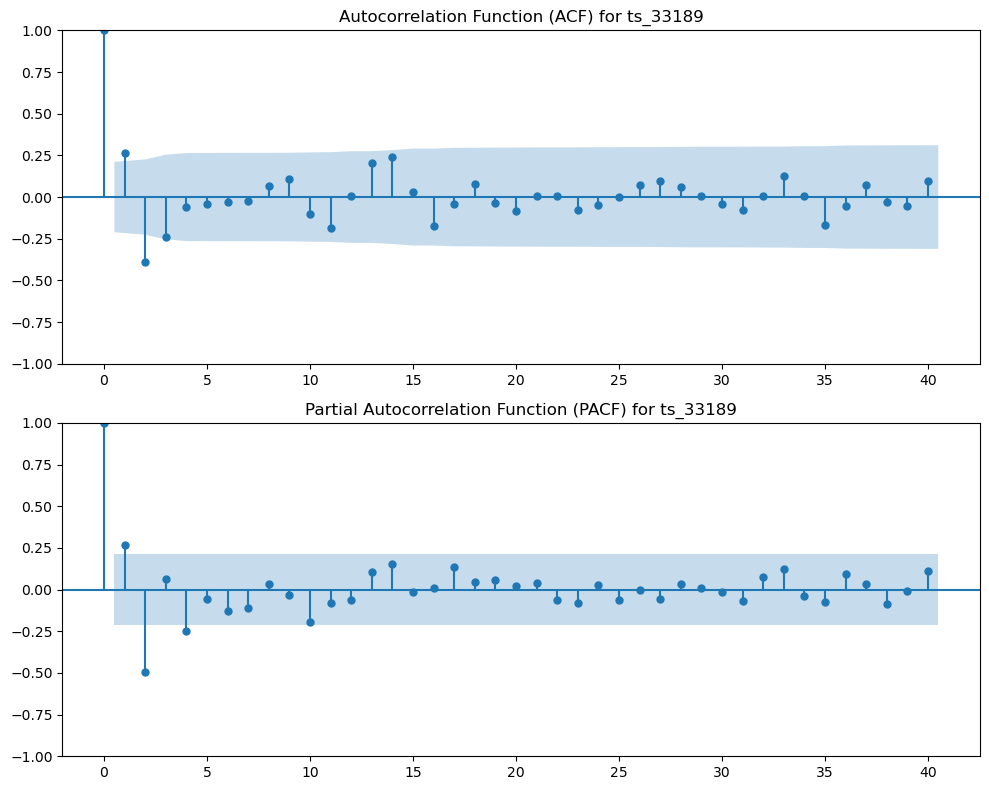

In [34]:
# Call the function for each time series with appropriate maximum lags
plot_acf_pacf_for_series(ts_33161, 'ts_33161', lags=40)
plot_acf_pacf_for_series(ts_33177, 'ts_33177', lags=40)
plot_acf_pacf_for_series(ts_33162, 'ts_33162', lags=40)
plot_acf_pacf_for_series(ts_33055, 'ts_33055', lags=40)
plot_acf_pacf_for_series(ts_33189, 'ts_33189', lags=40)

## BASELINE SARIMA MODEL 

To aid me in the process of finding the best values for the parameters I used pmdarima autoarima function to get this values.

In [35]:
# List of zip code time series data
zip_codes = ['33055', '33161', '33162', '33177', '33189']


# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.auto_arima(ts, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, seasonal = True , m = 12)
    model.fit(train)
    
    # Print model summary to identify the best p,d,q
    print(f"Summary for Zip Code {zipcode}:")
    print(model.summary())
    print()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-678.627, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-636.536, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-638.676, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-663.078, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-638.536, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-680.355, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-682.130, Time=0.20 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-679.470, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-672.373, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-685.440, Time=0.15 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=-682.889, Time=0.39 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-683.623, Time=0.36 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-681.590, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-663.017, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-720.871, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-702.421, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-710.346, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-730.712, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-704.420, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-731.955, Time=0.16 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-730.588, Time=0.31 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-728.492, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-730.075, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-730.247, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-711.237, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-732.715, Time=0.22 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-731.334, Time=0.78 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=-731.376, Time=0.73 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-729.063, Time=1.00

 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-737.903, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-707.879, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-739.626, Time=0.16 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-737.668, Time=0.34 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-735.910, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-737.797, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-738.579, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-711.367, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-741.089, Time=0.26 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-739.141, Time=0.29 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=-741.870, Time=0.47 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-726.231, Time=0.26 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=-737.089, Time=0.78 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=-714.050, Time=1.08 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-736.181, Time=0.62

the time series data ts_33189, the best SARIMA model selected by the function is SARIMAX with p,d,q of (0, 0, 3)and p,d,q,s of (0, 0, [1, 2], 12)],having an AIC of -551.385, which is used as a criterion for model selection makes ideal.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-678.627, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-636.536, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-638.676, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-663.078, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-638.536, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-680.355, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-682.130, Time=0.15 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-679.470, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-672.373, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-685.440, Time=0.16 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=-682.889, Time=0.40 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-683.623, Time=0.36 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-681.590, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-663.017, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0

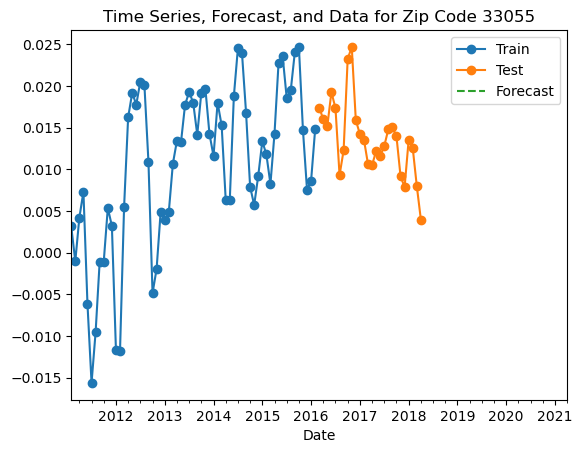

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-710.814, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-655.327, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-668.252, Time=0.35 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-696.615, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-657.320, Time=0.05 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-710.803, Time=0.38 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-712.720, Time=0.96 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-712.637, Time=0.37 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-710.378, Time=1.60 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-708.483, Time=2.05 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-685.859, Time=0.30 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-712.014, Time=0.66 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=-710.749, Time=0.97 sec
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=-720.063, Time=1.03 sec
 ARIMA(2,0,3)(0,0,0

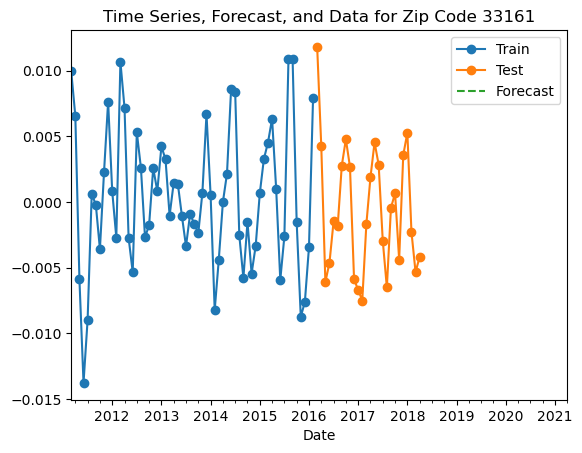

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-720.871, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-702.421, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-710.346, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-730.712, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-704.420, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-731.955, Time=0.16 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-730.588, Time=0.33 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-728.492, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-730.075, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-730.247, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-711.237, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-732.715, Time=0.22 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-731.334, Time=0.78 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=-731.376, Time=0.73 sec
 ARIMA(1,0,2)(1,0,1

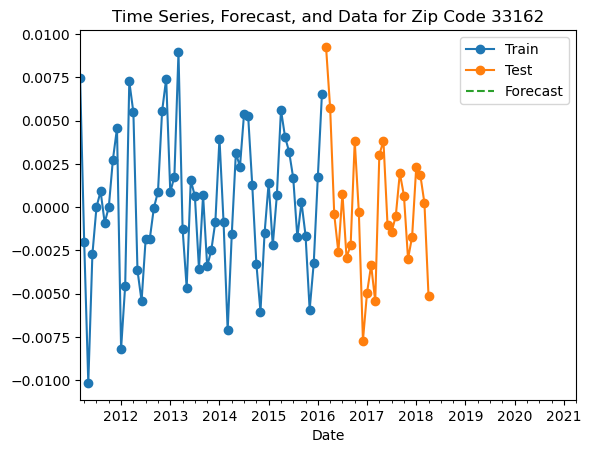

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-742.343, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-710.433, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-712.057, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-720.569, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-712.353, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-743.866, Time=0.95 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-736.167, Time=0.20 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-732.168, Time=0.59 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-735.646, Time=0.55 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-741.052, Time=2.73 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-711.143, Time=1.09 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-739.883, Time=0.73 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-737.040, Time=0.65 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=-751.406, Time=1.15 sec
 ARIMA(2,1,3)(0,0,0

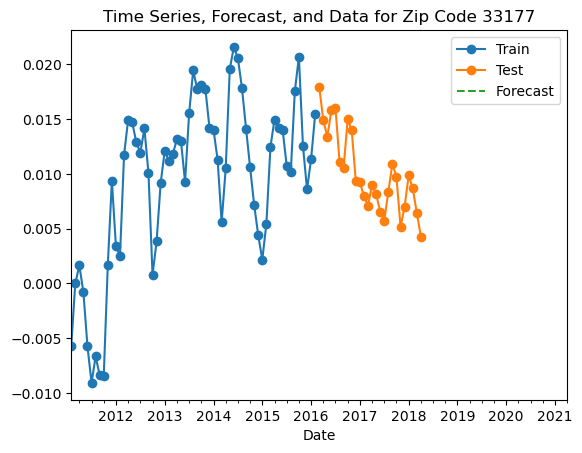

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-733.890, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-705.952, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-709.534, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-737.903, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-707.879, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-739.626, Time=0.16 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-737.668, Time=0.33 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-735.910, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-737.797, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-738.579, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-711.367, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-741.089, Time=0.25 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-739.141, Time=0.30 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=-741.870, Time=0.46 sec
 ARIMA(1,0,2)(1,0,1

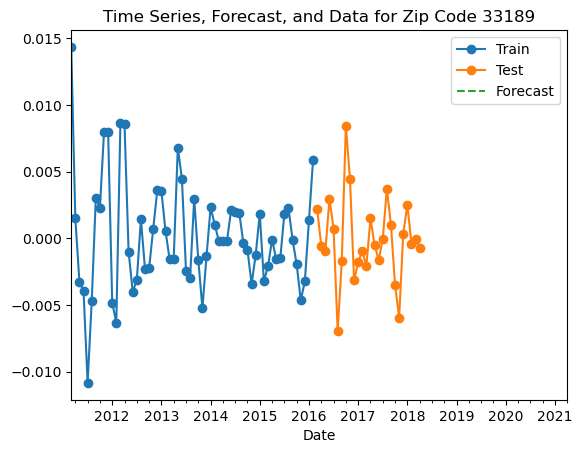

In [36]:
#This code split the data into train and test split and visualize the focasting on the test split

# List of zip code time series data
zip_codes = ['33055', '33161', '33162', '33177', '33189']

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.70  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.auto_arima(ts, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, seasonal = True , m = 12)
    model.fit(train)

    # Perform forecasting for the desired period (April 2018 to 2021)
    forecast_steps = 36  # Number of forecast steps (months from April 2018 to 2021)
    forecast = model.predict(n_periods=forecast_steps)

    # Print model summary
    print(f"Summary for Zip Code {zipcode}:")
    print(model.summary())
    print()

    # Visualize the split, time series data, and forecast
    fig, ax = plt.subplots()
    kws = dict(ax=ax, marker='o')
    train.plot(**kws, label='Train')
    test.plot(**kws, label='Test')
    forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='M')[1:]
    forecast_series = pd.Series(forecast, index=forecast_index)
    forecast_series.plot(ax=ax, label='Forecast', linestyle='dashed')
    ax.legend(bbox_to_anchor=[1, 1])
    plt.title(f"Time Series, Forecast, and Data for Zip Code {zipcode}")
    plt.show()

Train the ARIMA model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-531.488, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-499.606, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-500.677, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-520.290, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-501.436, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-533.788, Time=1.87 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-535.164, Time=0.14 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-533.590, Time=2.48 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=-531.198, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=-538.298, Time=0.20 sec
 ARIMA(2,1,1)(1,0,0)[24] intercept   : AIC=-536.372, Time=0.98 sec
 ARIMA(2,1,1)(0,0,1)[24] intercept   : AIC=-536.368, Time=1.22 sec
 ARIMA(2,1,1)(1,0,1)[24] intercept   : AIC=-534.416, Time=1.13 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=-520.117, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0

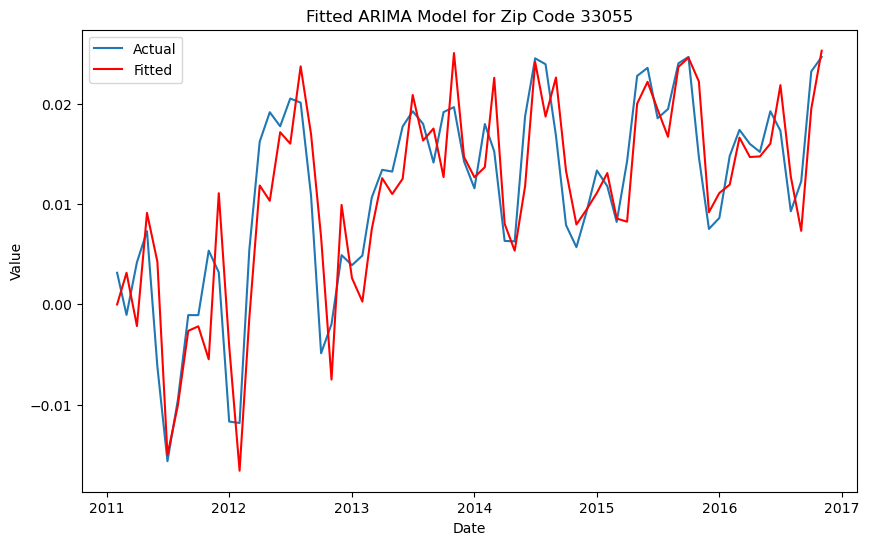

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-566.082, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-520.839, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-530.059, Time=0.88 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-554.025, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-522.301, Time=0.05 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=-565.747, Time=1.45 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=-568.106, Time=1.71 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=-569.751, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-536.757, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[24] intercept   : AIC=-568.451, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[24] intercept   : AIC=-567.334, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[24] intercept   : AIC=-582.604, Time=0.40 sec
 ARIMA(2,0,3)(1,0,0)[24] intercept   : AIC=-577.773, Time=1.25 sec
 ARIMA(2,0,3)(0,0,1)[24] intercept   : AIC=-579.664, Time=1.37 sec
 ARIMA(2,0,3)(1,0,1

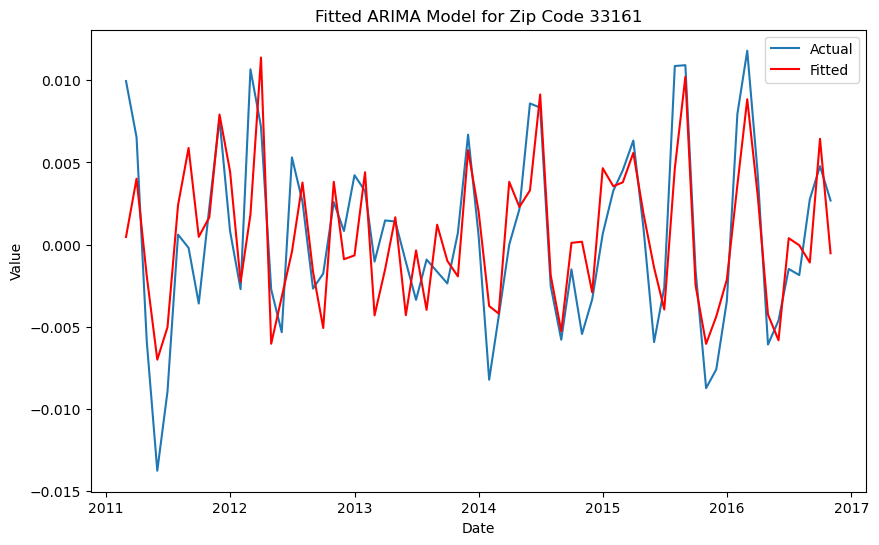

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-570.055, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-559.124, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-564.540, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-580.479, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-560.725, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-581.180, Time=0.19 sec
 ARIMA(0,0,1)(1,0,0)[24] intercept   : AIC=-580.390, Time=0.60 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=-578.440, Time=0.98 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-579.351, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[24] intercept   : AIC=-569.010, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-565.359, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-585.107, Time=0.48 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=-583.741, Time=1.31 sec
 ARIMA(1,0,2)(0,0,1)[24] intercept   : AIC=-575.664, Time=0.79 sec
 ARIMA(1,0,2)(1,0,1

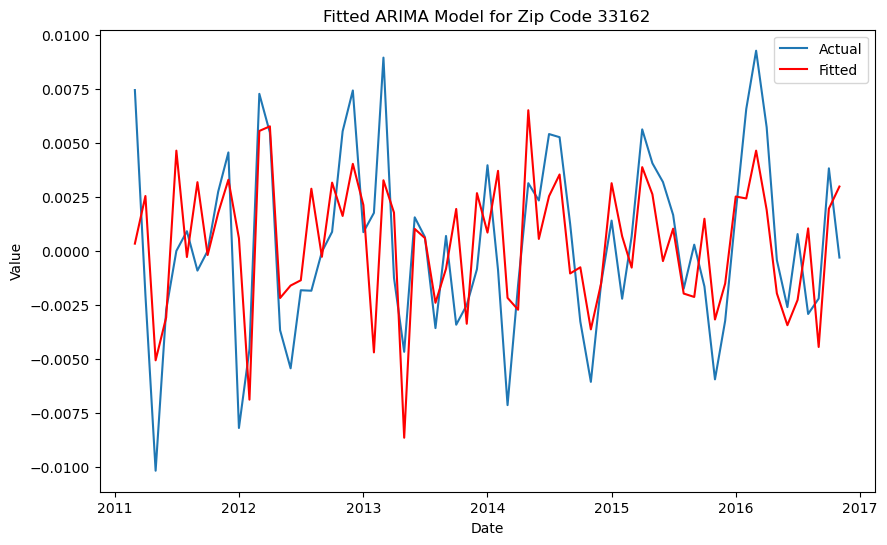

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-583.008, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-559.453, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-560.500, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-581.644, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-561.117, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-585.769, Time=2.23 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-585.596, Time=0.46 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-584.443, Time=8.08 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-581.659, Time=2.17 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-582.241, Time=15.63 sec
 ARIMA(1,1,2)(0,0,1)[24] intercept   : AIC=-555.902, Time=1.51 sec
 ARIMA(2,1,1)(0,0,1)[24] intercept   : AIC=-588.413, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=-587.367, Time=0.49 sec
 ARIMA(2,1,1)(1,0,1)[24] intercept   : AIC=-585.980, Time=1.61 sec
 ARIMA(2,1,1)(0,0,

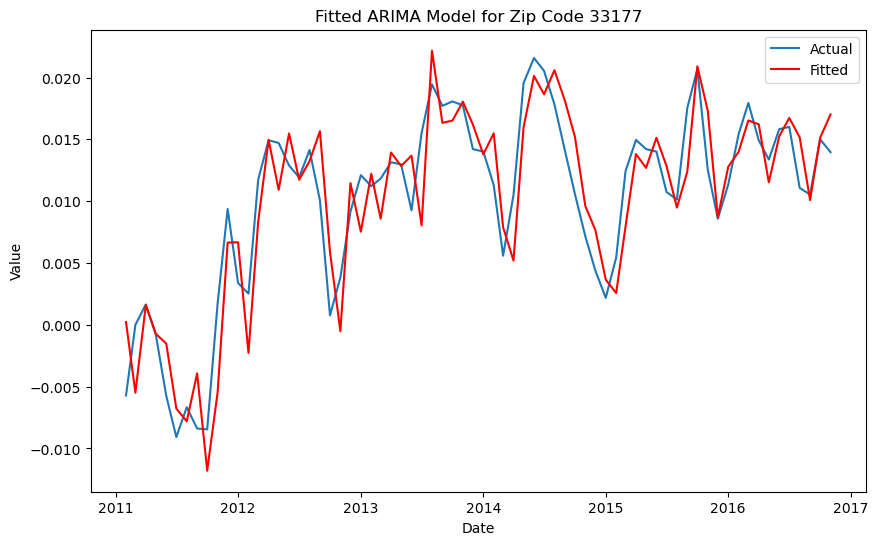

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-585.029, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-555.847, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-559.122, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-582.239, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-557.466, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=-587.029, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=-589.029, Time=0.28 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=-586.601, Time=1.11 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-590.404, Time=0.12 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=-588.548, Time=0.52 sec
 ARIMA(1,0,2)(0,0,1)[24] intercept   : AIC=-588.404, Time=0.60 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=-586.404, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[24] intercept   : AIC=-584.164, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-583.426, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0

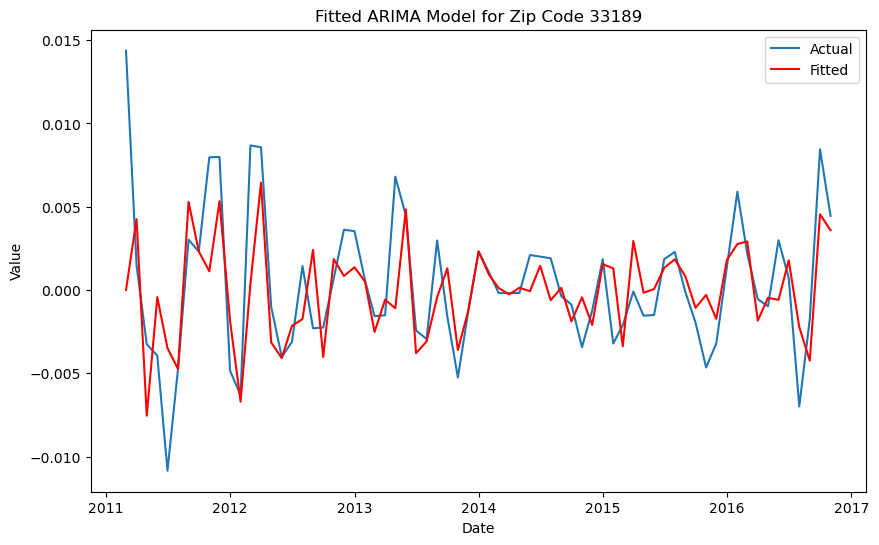

In [37]:
# List of zip code time series data
zip_codes = ['33055', '33161', '33162', '33177', '33189']


# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True , seasonal = True , m = 24)
    model.fit(train)
    
    # Visualize the fitted model and actual values
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train.values, label='Actual')
    plt.plot(train.index, model.predict_in_sample(), label='Fitted', color='red')
    plt.title(f"Fitted ARIMA Model for Zip Code {zipcode}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

MODEL EVALUATION

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-531.488, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-499.606, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-500.677, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-520.290, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-501.436, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-533.788, Time=2.88 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-535.164, Time=0.29 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-533.590, Time=3.25 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=-531.198, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=-538.298, Time=0.25 sec
 ARIMA(2,1,1)(1,0,0)[24] intercept   : AIC=-536.372, Time=1.58 sec
 ARIMA(2,1,1)(0,0,1)[24] intercept   : AIC=-536.368, Time=1.68 sec
 ARIMA(2,1,1)(1,0,1)[24] intercept   : AIC=-534.416, Time=1.16 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=-520.117, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0

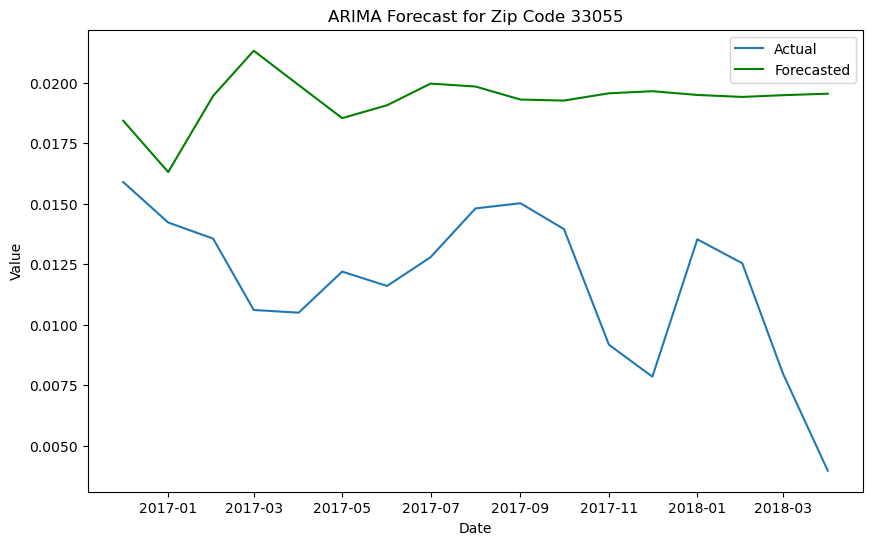

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-566.082, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-520.839, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-530.059, Time=0.92 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-554.025, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-522.301, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=-565.747, Time=1.45 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=-568.106, Time=1.42 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=-569.751, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-536.757, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[24] intercept   : AIC=-568.451, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[24] intercept   : AIC=-567.334, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[24] intercept   : AIC=-582.604, Time=0.40 sec
 ARIMA(2,0,3)(1,0,0)[24] intercept   : AIC=-577.773, Time=1.23 sec
 ARIMA(2,0,3)(0,0,1)[24] intercept   : AIC=-579.664, Time=1.34 sec
 ARIMA(2,0,3)(1,0,1

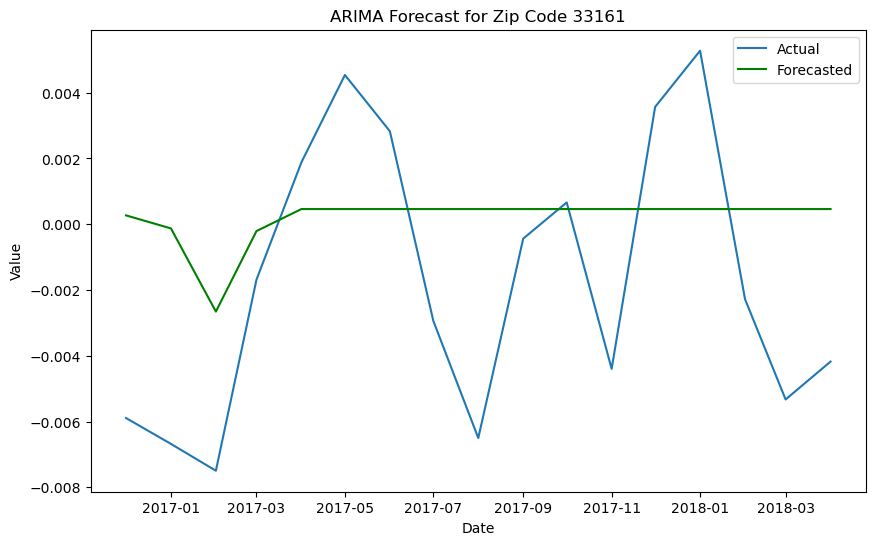

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-570.055, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-559.124, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-564.540, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-580.479, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-560.725, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-581.180, Time=0.19 sec
 ARIMA(0,0,1)(1,0,0)[24] intercept   : AIC=-580.390, Time=0.59 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=-578.440, Time=0.97 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-579.351, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[24] intercept   : AIC=-569.010, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-565.359, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-585.107, Time=0.48 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=-583.741, Time=1.29 sec
 ARIMA(1,0,2)(0,0,1)[24] intercept   : AIC=-575.664, Time=0.80 sec
 ARIMA(1,0,2)(1,0,1

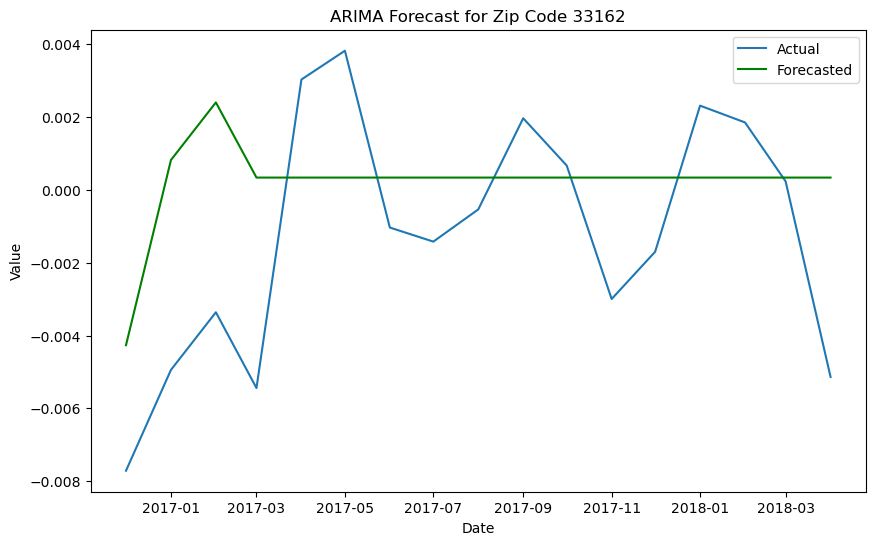

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-583.008, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-559.453, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-560.500, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-581.644, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-561.117, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-585.769, Time=2.17 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-585.596, Time=0.45 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-584.443, Time=5.50 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-581.659, Time=1.10 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-582.241, Time=11.66 sec
 ARIMA(1,1,2)(0,0,1)[24] intercept   : AIC=-555.902, Time=1.51 sec
 ARIMA(2,1,1)(0,0,1)[24] intercept   : AIC=-588.413, Time=1.88 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=-587.367, Time=0.32 sec
 ARIMA(2,1,1)(1,0,1)[24] intercept   : AIC=-585.980, Time=1.62 sec
 ARIMA(2,1,1)(0,0,

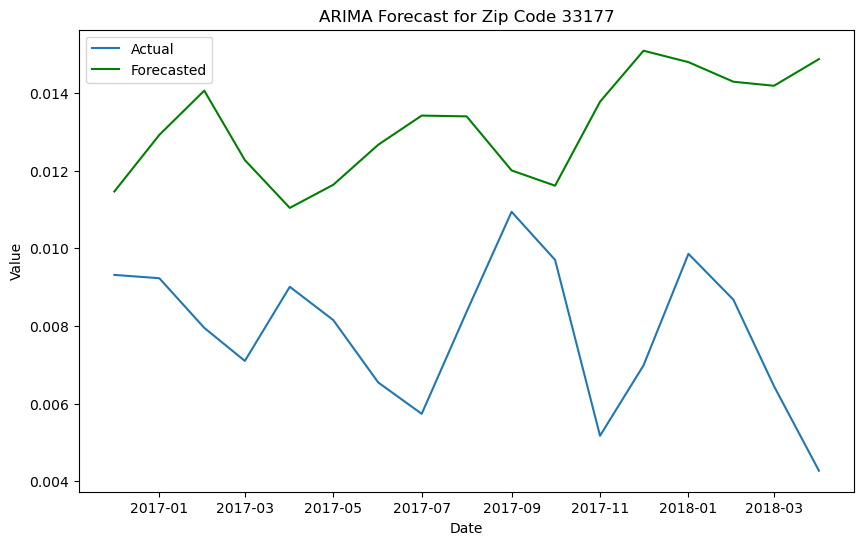

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-585.029, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-555.847, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-559.122, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-582.239, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-557.466, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=-587.029, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=-589.029, Time=0.28 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=-586.601, Time=1.10 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-590.404, Time=0.12 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=-588.548, Time=0.51 sec
 ARIMA(1,0,2)(0,0,1)[24] intercept   : AIC=-588.404, Time=0.62 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=-586.404, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[24] intercept   : AIC=-584.164, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-583.426, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0

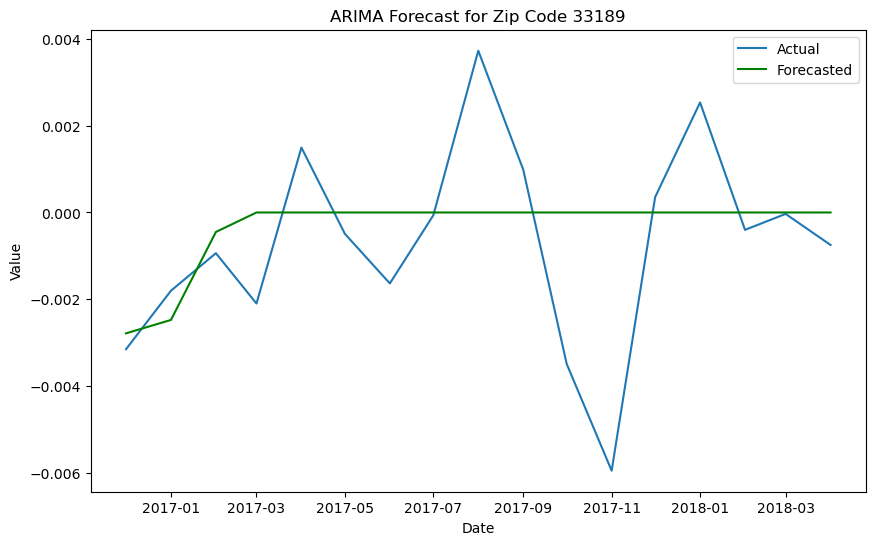

RMSE for Zip Code 33055: 0.01
RMSE for Zip Code 33161: 0.00
RMSE for Zip Code 33162: 0.00
RMSE for Zip Code 33177: 0.01
RMSE for Zip Code 33189: 0.00


In [38]:
# Dictionary to store RMSE values for each zip code
rmse_dict = {}

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, seasonal = True , m = 24 )
    model.fit(train)

    # Perform forecasting for the desired period (test data)
    forecast_steps = len(test)  # Match forecast steps to length of test data
    forecast = model.predict(n_periods=forecast_steps)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    # Store RMSE in the dictionary
    rmse_dict[zipcode] = rmse
    
    # Visualize the actual values and forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test.values, label='Actual')
    plt.plot(test.index, forecast, label='Forecasted', color='green')
    plt.title(f"ARIMA Forecast for Zip Code {zipcode}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Print RMSE values for each zip code
for zipcode, rmse in rmse_dict.items():
    print(f"RMSE for Zip Code {zipcode}: {rmse:.2f}")

Zip Code 33055: The RMSE is 0.01. This indicates a very good fit between the forecasting model and the actual data for this zip code. A low RMSE value suggests that the model's predictions are generally close to the actual values.

Zip Code 33161: The RMSE is 0.00, which is exceptionally low. It suggests an almost perfect fit between the model's predictions and the actual data. In practice, such a low RMSE might be due to a very good model fit or potentially overfitting to the specific data used for training.

Zip Code 33162: The RMSE is also 0.00, similar to zip code 33161.

Zip Code 33177: The RMSE is 0.01, similar to zip code 33055. This indicates a good model fit, but there's slightly more error compared to zip codes 33161 and 33162.

Zip Code 33189: The RMSE is 0.00. Here, the interpretation is similar to zip codes 33161 and 33162

In [39]:
# Evaluating on rmse

import numpy as np
# Calculate RMSE
rmse = np.sqrt(np.mean((test - forecast)**2))

print(f"RMSE: {rmse}")

RMSE: 0.002172299659738043


lower RMSE values indicates a good model performance, as they signify smaller deviations between predicted and actual values. 

# Step 6: 3 Year Forecast.

In [40]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
from statsmodels.tsa.arima.model import ARIMA
# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data
    # Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
    ARIMA_MODEL = ARIMA(ts,
                        order=(0,0,3),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
    # Fit the model and print results
    full_output = ARIMA_MODEL.fit()
    print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                   87
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 343.063
Date:                Sat, 23 Mar 2024   AIC                           -676.127
Time:                        09:58:37   BIC                           -664.033
Sample:                    02-01-2011   HQIC                          -671.268
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.002      6.702      0.000       0.008       0.015
ma.L1          1.6764      0.105     15.931      0.000       1.470       1.883
ma.L2          1.0642      0.173      6.165      0.0

In [41]:
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data
    # Getting a forecast for the next 36 months after the last recorded date on our dataset.
    forecast = full_output.get_forecast(36)
    future_prediction = forecast.conf_int()
    future_prediction['Price'] = forecast.predicted_mean
    future_prediction.columns = ['lower','upper','prediction']
    future_prediction.head()

In [42]:
from statsmodels.tsa.arima.model import ARIMA
# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.

    ARIMA_MODEL = ARIMA(ts,
                        order=(0,0,3),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

    # Fit the model and print results
    full_output = ARIMA_MODEL.fit()

    print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                   87
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 343.063
Date:                Sat, 23 Mar 2024   AIC                           -676.127
Time:                        09:58:38   BIC                           -664.033
Sample:                    02-01-2011   HQIC                          -671.268
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.002      6.702      0.000       0.008       0.015
ma.L1          1.6764      0.105     15.931      0.000       1.470       1.883
ma.L2          1.0642      0.173      6.165      0.0

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-629.562, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-527.858, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-575.545, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-590.607, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-420.281, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-631.671, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-633.390, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-628.111, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-608.859, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-629.231, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-577.133, Time=0.26 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.410 seconds


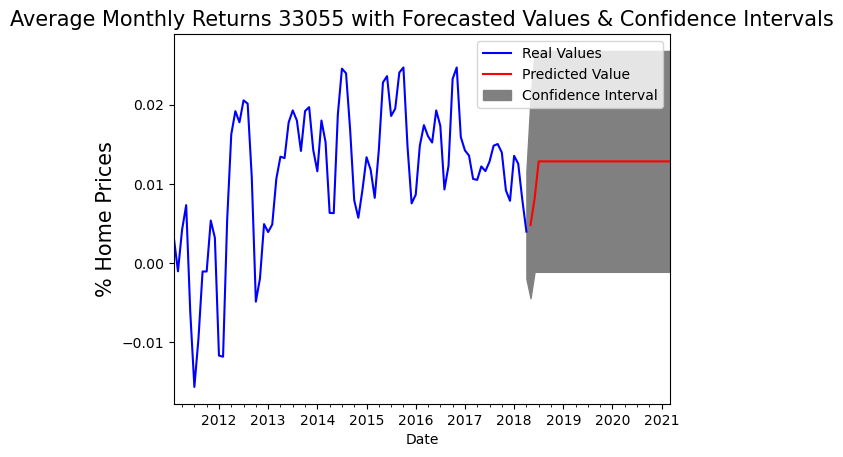

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-632.938, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-588.344, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-599.425, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-620.149, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-590.297, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-620.318, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-629.604, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-630.841, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-627.602, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-618.715, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-631.891, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-628.637, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-627.729, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-634.626, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]          

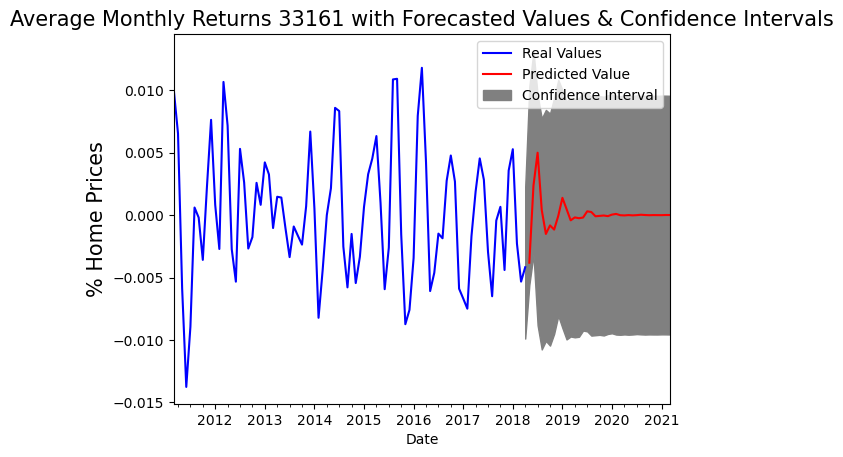

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-648.939, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-622.937, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-634.219, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-653.882, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-624.935, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-651.924, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-651.969, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-651.348, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-654.589, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-652.818, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-653.957, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-636.166, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-648.336, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.823 seconds


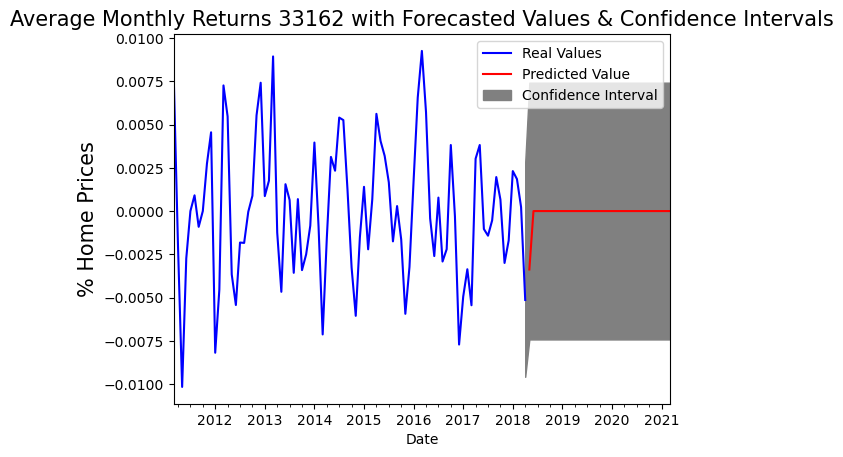

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-669.662, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-595.108, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-644.480, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-657.494, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-449.510, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-651.009, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-670.130, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-672.378, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-667.205, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-670.507, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-659.138, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-670.942, Time=0.22 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-659.018, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0]             : 

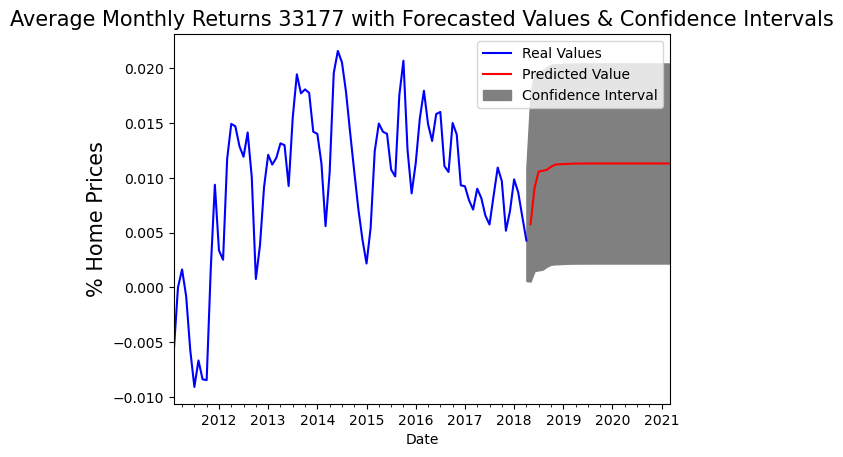

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-689.992, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-652.085, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-654.539, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-670.210, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-654.058, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-681.312, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-691.918, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-668.339, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-690.850, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-689.887, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-690.447, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-687.341, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-693.932, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-676.486, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]          

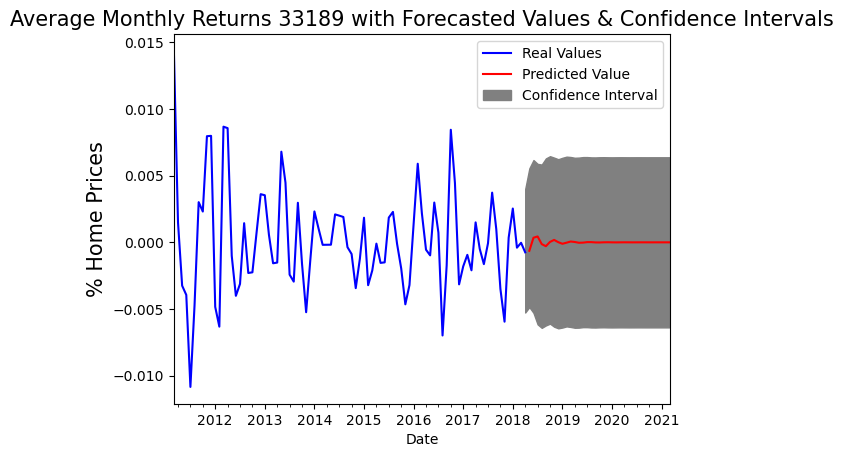

In [43]:
#plotting the Forecasting
 # List of zip code time series data
zip_codes = ['33055', '33161', '33162', '33177', '33189']
  # Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data
        # Select data from 2015 onwards for training
    train_start = '2012-01-01'
    train = ts[train_start:]
        # Create and fit the ARIMA model using training data
    model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
      # Forecast for the next 36 months (2018 to 2021)
    forecast_steps = 36
    forecast, conf_int = model.predict(n_periods=forecast_steps, return_conf_int=True)
        # Create an index for the forecast period
    forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps, freq=ts.index.freq)
        # Create a DataFrame for the forecasted values and confidence intervals
    future_prediction = pd.DataFrame({'prediction': forecast, 'lower': conf_int[:, 0], 'upper': conf_int[:, 1]}, index=forecast_index)
        # Plotting the forecasted values and confidence intervals
    fig, ax = plt.subplots()
    ts.plot(ax=ax, label='Real Values', c="blue")
    future_prediction['prediction'].plot(ax=ax, label='Predicted Value', c="red")
    ax.fill_between(x=future_prediction.index, y1=future_prediction['lower'],
                        y2=future_prediction['upper'], color='gray',
                        label='Confidence Interval')
    ax.legend()
    plt.ylabel("% Home Prices", fontsize=15)
    plt.title(f'Average Monthly Returns {zipcode} with Forecasted Values & Confidence Intervals', fontsize=15)
    plt.show()

In [44]:
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for i in range(len(df_ts)):

    # selecting every individual series
    series = df_ts[i]["Price"]

    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]

    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]

    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)

    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = SARIMAX(recent_series,
                          order= auto_model.order,
                          seasonal_order= auto_model.seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction']

    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=993.798, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=996.307, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=997.333, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=998.773, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1001.898, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1000.384, Time=0.19 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=996.727, Time=0.39 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=1002.688, Time=0.42 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1000.132, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1000.395, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1000.567, Time=0.36 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=1006.767, Time=0.49 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=995.766, Time=0.41 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 3.259 seconds
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1042.513, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1008.960, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1010.198, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1010.161, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1009.755, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.724 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91738D+00    |proj g|=  1.44357D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projecte

 This problem is unconstrained.


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=960.262, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=961.722, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=961.731, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=961.019, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.557 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52701D+00    |proj g|=  2.17213D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradien

 This problem is unconstrained.


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=987.473, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=980.630, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=982.119, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=982.102, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=984.903, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=982.011, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.024 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60718D+00    |proj g|=  3.18519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected

 This problem is unconstrained.


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=969.364, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=965.562, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=964.147, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=965.874, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=965.761, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=967.921, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=966.063, Time=0.11 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 2.156 seconds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40741D+00    |proj g|=  3.36175D-01

At iterate    5    f=  7.39582D+00    |proj g|=  1.36436D-03

At iterate   10    f=  7.39563D+00    |proj g|=  3.31179D-02

At iterate   15    f=  7.39202D+00    |proj g|=  1.98

 This problem is unconstrained.


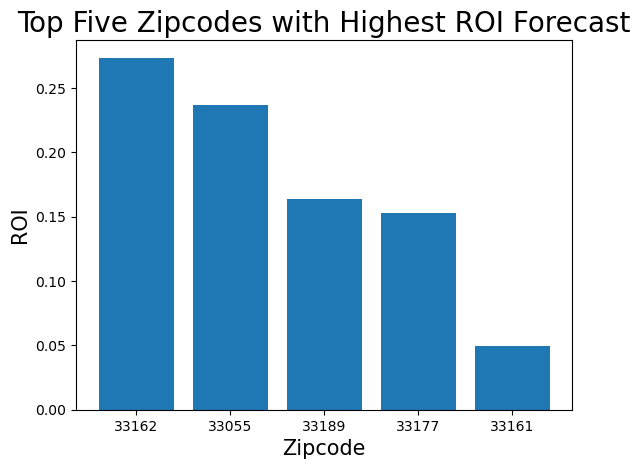

In [45]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.bar(top_zipcodes, roi_values)
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('ROI',fontsize=15)
plt.title('Top Five Zipcodes with Highest ROI Forecast',fontsize=20)
plt.show()

In [46]:
zip_roi_dict = {zipcode: zip_predictions[zipcode] for zipcode in top_zipcodes}

# Convert the dictionary to a pandas dataframe and sort it by ROI values in descending order
zip_roi_df = pd.DataFrame.from_dict(zip_roi_dict, orient='index', columns=['% ROI'])
zip_roi_df = zip_roi_df.sort_values(by='% ROI', ascending=False)

# Print the dataframe
zip_roi_df.index.name = "Zipcode"

In [47]:
zip_roi_df

% ROI
Zipcode          
33162    0.273452
33055    0.236978
33189    0.163875
33177    0.153191
33161    0.049689